#PROPERATI

Previamente se guardó en un archivo properati3.csv el dataset resultante de la limpieza realizada al dataset original en el trabajo práctico N1.

Para el presente trabajo se parte de ese dataset resultante.

In [301]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from google.colab import drive
import re
import pylab

drive.mount("/content/gdrive", force_remount=True)
location = "/content/gdrive/My Drive/Desafío 1 DH - Equipo 3/Data/properati3.csv"
data = pd.read_csv(location)
data.head()

Mounted at /content/gdrive


,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat,lon,surface_covered_in_m2,price_usd_per_m2,description,title,place_name_caba_mayus,comuna,place_name_2,surface_total_in_m2_clean,ambientes,cochera,gimnasio,sum,pileta,parrilla,cantidad_amenities,estado
0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,-34.661824,-58.508839,40.0,1127.272727,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,MATADEROS,9.0,Mataderos,55.0,2.0,0,0,0,0,0,0,0
1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,-34.903883,-57.964330,NaN,NaN,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,NaN,NaN,La Plata,NaN,3.0,1,0,0,0,0,0,0
2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,-34.652262,-58.522982,55.0,1309.090909,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,MATADEROS,9.0,Mataderos,55.0,2.0,0,0,0,0,0,0,0
3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,-34.647797,-58.516424,NaN,NaN,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,LINIERS,9.0,Liniers,NaN,3.0,0,0,0,0,0,0,0
4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,-38.002626,-57.549447,35.0,1828.571429,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,NaN,NaN,Mar del Plata,35.0,2.0,0,0,0,0,0,0,0


In [302]:
data.info()
data_shape = data.shape[0]
data_columns = data.shape[1]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118486 entries, 0 to 118485
Data columns (total 25 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   operation                  118486 non-null  object 
 1   property_type              118486 non-null  object 
 2   place_name                 118486 non-null  object 
 3   place_with_parent_names    118486 non-null  object 
 4   country_name               118486 non-null  object 
 5   state_name                 118486 non-null  object 
 6   geonames_id                100568 non-null  float64
 7   lat                        69670 non-null   float64
 8   lon                        69670 non-null   float64
 9   surface_covered_in_m2      101136 non-null  float64
 10  price_usd_per_m2           79672 non-null   float64
 11  description                118486 non-null  object 
 12  title                      118486 non-null  object 
 13  place_name_caba_mayus      32

## Limpieza atributos

Vemos aquellos campos que creemos que sólo tienen un valor y luego procedemos a borrarlos:

In [303]:
data.operation.value_counts()

sell    118486
Name: operation, dtype: int64

In [304]:
data.country_name.value_counts()

Argentina    118486
Name: country_name, dtype: int64

In [305]:
data.drop(columns=['operation', 'place_with_parent_names', 'place_name', 'country_name'],inplace=True)

Cabe destacar que también borramos place_with_parent_names y place_name ya que decidimos quedarnos con el campo que armamos en base a esos dos: place_name_2.

##Limpieza duplicados

In [306]:
data.shape

(118486, 21)

In [307]:
data[data.duplicated()]

,property_type,state_name,geonames_id,lat,lon,surface_covered_in_m2,price_usd_per_m2,description,title,place_name_caba_mayus,comuna,place_name_2,surface_total_in_m2_clean,ambientes,cochera,gimnasio,sum,pileta,parrilla,cantidad_amenities,estado
221,apartment,Capital Federal,3436077.0,-34.565265,-58.438233,53.0,3447.753623,El edificio está situado en el barrio de las ...,Ultimas Unidades,BELGRANO,13.0,Belgrano,69.0,1.0,1,0,0,1,0,1,0
245,apartment,Santa Fe,3838574.0,-32.949557,-60.658284,35.0,NaN,Departamento de un ambiente al contrafrente co...,"Departamentos monoambiente, zona parque Indepe...",NaN,NaN,Rosario,35.0,2.0,0,0,0,0,0,0,0
247,apartment,Santa Fe,3838574.0,-32.949557,-60.658284,35.0,NaN,Departamento de un ambiente al contrafrente co...,"Departamentos monoambiente, zona parque Indepe...",NaN,NaN,Rosario,35.0,2.0,0,0,0,0,0,0,0
248,apartment,Santa Fe,3838574.0,-32.949557,-60.658284,35.0,NaN,Departamento de un ambiente al contrafrente co...,"Departamentos monoambiente, zona parque Indepe...",NaN,NaN,Rosario,35.0,2.0,0,0,0,0,0,0,0
249,apartment,Santa Fe,3838574.0,-32.949557,-60.658284,35.0,NaN,Departamento de un ambiente al contrafrente co...,"Departamentos monoambiente, zona parque Indepe...",NaN,NaN,Rosario,35.0,2.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118467,apartment,Córdoba,3860255.0,NaN,NaN,NaN,1680.266800,UBICACIÓNEstratégicamente ubicado en calle Obi...,Departamento - Nueva Cordoba,NaN,NaN,Córdoba,50.0,3.0,0,0,1,0,0,1,2
118470,apartment,Córdoba,3860255.0,NaN,NaN,NaN,1684.753600,UBICACIÓNEstratégicamente ubicado en calle Obi...,Departamento - Nueva Cordoba,NaN,NaN,Córdoba,50.0,3.0,0,0,1,0,0,1,2
118472,apartment,Córdoba,3860255.0,NaN,NaN,NaN,1690.362000,UBICACIÓNEstratégicamente ubicado en calle Obi...,Departamento - Nueva Cordoba,NaN,NaN,Córdoba,50.0,3.0,0,0,1,0,0,1,2
118474,house,Bs.As. G.B.A. Zona Norte,3434130.0,NaN,NaN,178.0,NaN,Puertos- Barrio Vistas - L. 88Casa en venta so...,"Casa en venta Puertos, barrio Vistas",NaN,NaN,Escobar,178.0,4.0,0,0,0,0,1,1,0


In [308]:
data.drop_duplicates(keep = 'first', inplace = True) 

In [309]:
data.shape

(113010, 21)

Borramos los campos de título y descripción ya que no nos servirán para el análisis que se desea hacer.

In [310]:
data.drop(columns=['title','description'],inplace=True)

# Argentina

## Llenado de valores vacíos

In [311]:
argentina=data

In [312]:
argentina.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113010 entries, 0 to 118485
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   property_type              113010 non-null  object 
 1   state_name                 113010 non-null  object 
 2   geonames_id                95661 non-null   float64
 3   lat                        67668 non-null   float64
 4   lon                        67668 non-null   float64
 5   surface_covered_in_m2      96703 non-null   float64
 6   price_usd_per_m2           77701 non-null   float64
 7   place_name_caba_mayus      30649 non-null   object 
 8   comuna                     30649 non-null   float64
 9   place_name_2               113010 non-null  object 
 10  surface_total_in_m2_clean  92029 non-null   float64
 11  ambientes                  86023 non-null   float64
 12  cochera                    113010 non-null  int64  
 13  gimnasio                   11

Vemos que vamos a rellenar los campos:

*   price_usd_per_m2
*   surface_total_in_m2_clean
*   ambientes




## Limpieza

###Superficie

In [313]:
# Primero nos fijamos cuántos valores vacíos hay en la columna 'surface_total_in_m2_clean'
argentina.surface_total_in_m2_clean.isnull().value_counts()

False    92029
True     20981
Name: surface_total_in_m2_clean, dtype: int64

In [314]:
# Imputamos los valores vacíos con la mediana
argentina['surface_total_in_m2_clean'] = argentina['surface_total_in_m2_clean'].fillna(argentina.groupby(['state_name', 'place_name_2','ambientes', 'property_type'])['surface_total_in_m2_clean'].transform('median'))

# Volvemos a chequear la cantidad de valores vacíos
argentina.surface_total_in_m2_clean.isnull().value_counts()

False    106737
True       6273
Name: surface_total_in_m2_clean, dtype: int64

In [315]:
# Imputamos nuevamente por menos features
argentina['surface_total_in_m2_clean'] = argentina['surface_total_in_m2_clean'].fillna(argentina.groupby(['state_name', 'ambientes', 'property_type'])['surface_total_in_m2_clean'].transform('median'))

# Volvemos a chequear la cantidad de valores vacíos
argentina.surface_total_in_m2_clean.isnull().value_counts()

False    107689
True       5321
Name: surface_total_in_m2_clean, dtype: int64

###Ambientes

In [316]:
argentina.ambientes.value_counts()

3.0     25657
2.0     22240
4.0     19881
5.0      8447
6.0      3650
1.0      3278
7.0      1421
8.0       674
9.0       387
11.0      207
10.0      181
Name: ambientes, dtype: int64

In [317]:
# Imputamos los valores vacíos con la mediana
argentina['ambientes'] = argentina['ambientes'].fillna(argentina.groupby(['state_name', 'surface_total_in_m2_clean', 'property_type'])['ambientes'].transform('median'))

# Volvemos a chequear la cantidad de valores vacíos
print(argentina.ambientes.isnull().value_counts())

False    105514
True       7496
Name: ambientes, dtype: int64


In [318]:
# Imputamos nuevamente por menos features
argentina['ambientes'] = argentina['ambientes'].fillna(argentina.groupby(['surface_total_in_m2_clean', 'property_type'])['ambientes'].transform('median'))

# Volvemos a chequear la cantidad de valores vacíos
print(argentina.ambientes.isnull().value_counts())

False    107198
True       5812
Name: ambientes, dtype: int64


### Precio

In [319]:
# Imputamos los valores vacíos con la mediana
argentina['price_usd_per_m2'] = argentina['price_usd_per_m2'].fillna(argentina.groupby(['state_name','place_name_2','surface_total_in_m2_clean', 'property_type', 'ambientes'])['price_usd_per_m2'].transform('median'))

# Volvemos a chequear la cantidad de valores vacíos
print(argentina.price_usd_per_m2.isnull().value_counts())

False    98804
True     14206
Name: price_usd_per_m2, dtype: int64


In [320]:
# Imputamos nuevamente por menos features
argentina['price_usd_per_m2'] = argentina['price_usd_per_m2'].fillna(argentina.groupby(['state_name','place_name_2','surface_total_in_m2_clean', 'property_type'])['price_usd_per_m2'].transform('median'))

# Volvemos a chequear la cantidad de valores vacíos
print(argentina.price_usd_per_m2.isnull().value_counts())

False    101786
True      11224
Name: price_usd_per_m2, dtype: int64


## Regresión lineal base

In [321]:
# Importamos las librerías necesarias
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

argentina.head()

,property_type,state_name,geonames_id,lat,lon,surface_covered_in_m2,price_usd_per_m2,place_name_caba_mayus,comuna,place_name_2,surface_total_in_m2_clean,ambientes,cochera,gimnasio,sum,pileta,parrilla,cantidad_amenities,estado
0,PH,Capital Federal,3430787.0,-34.661824,-58.508839,40.0,1127.272727,MATADEROS,9.0,Mataderos,55.0,2.0,0,0,0,0,0,0,0
1,apartment,Bs.As. G.B.A. Zona Sur,3432039.0,-34.903883,-57.964330,NaN,1407.692308,NaN,NaN,La Plata,65.0,3.0,1,0,0,0,0,0,0
2,apartment,Capital Federal,3430787.0,-34.652262,-58.522982,55.0,1309.090909,MATADEROS,9.0,Mataderos,55.0,2.0,0,0,0,0,0,0,0
3,PH,Capital Federal,3431333.0,-34.647797,-58.516424,NaN,1707.317073,LINIERS,9.0,Liniers,82.0,3.0,0,0,0,0,0,0,0
4,apartment,Buenos Aires Costa Atlántica,3435548.0,-38.002626,-57.549447,35.0,1828.571429,NaN,NaN,Mar del Plata,35.0,2.0,0,0,0,0,0,0,0


In [322]:
argentina.corr()

,geonames_id,lat,lon,surface_covered_in_m2,price_usd_per_m2,comuna,surface_total_in_m2_clean,ambientes,cochera,gimnasio,sum,pileta,parrilla,cantidad_amenities,estado
geonames_id,1.000000,0.169028,-0.291888,-0.005436,-0.116432,-0.166893,-0.044629,0.038469,-0.025001,-0.050425,-0.055313,-0.062202,-0.165824,-0.129776,0.016868
lat,0.169028,1.000000,-0.306351,0.007811,-0.028166,0.362418,0.040702,0.107044,0.047659,-0.005433,0.006002,0.073510,-0.085206,-0.005549,0.019954
lon,-0.291888,-0.306351,1.000000,-0.009468,0.167116,-0.462700,-0.058824,-0.171652,-0.014726,0.049157,0.009016,0.006421,0.174221,0.093701,-0.045877
surface_covered_in_m2,-0.005436,0.007811,-0.009468,1.000000,-0.040512,-0.015244,0.112250,0.087109,-0.005503,-0.006803,-0.022681,0.036879,0.022896,0.016614,-0.013908
price_usd_per_m2,-0.116432,-0.028166,0.167116,-0.040512,1.000000,0.140129,-0.309731,-0.192575,0.161180,0.260933,0.220937,0.090949,0.026647,0.187254,0.026940
comuna,-0.166893,0.362418,-0.462700,-0.015244,0.140129,1.000000,-0.026181,-0.013161,0.094010,0.045332,0.047569,0.048516,0.060814,0.068977,-0.022681
surface_total_in_m2_clean,-0.044629,0.040702,-0.058824,0.112250,-0.309731,-0.026181,1.000000,0.596989,-0.025730,-0.049080,-0.118915,0.205271,0.207573,0.126195,-0.094189
ambientes,0.038469,0.107044,-0.171652,0.087109,-0.192575,-0.013161,0.596989,1.000000,0.019403,-0.039400,-0.106929,0.114340,0.090943,0.043499,-0.082391
cochera,-0.025001,0.047659,-0.014726,-0.005503,0.161180,0.094010,-0.025730,0.019403,1.000000,0.207953,0.176290,0.183388,0.119782,0.239765,0.072876
gimnasio,-0.050425,-0.005433,0.049157,-0.006803,0.260933,0.045332,-0.049080,-0.039400,0.207953,1.000000,0.352171,0.393003,0.171857,0.610057,0.013137


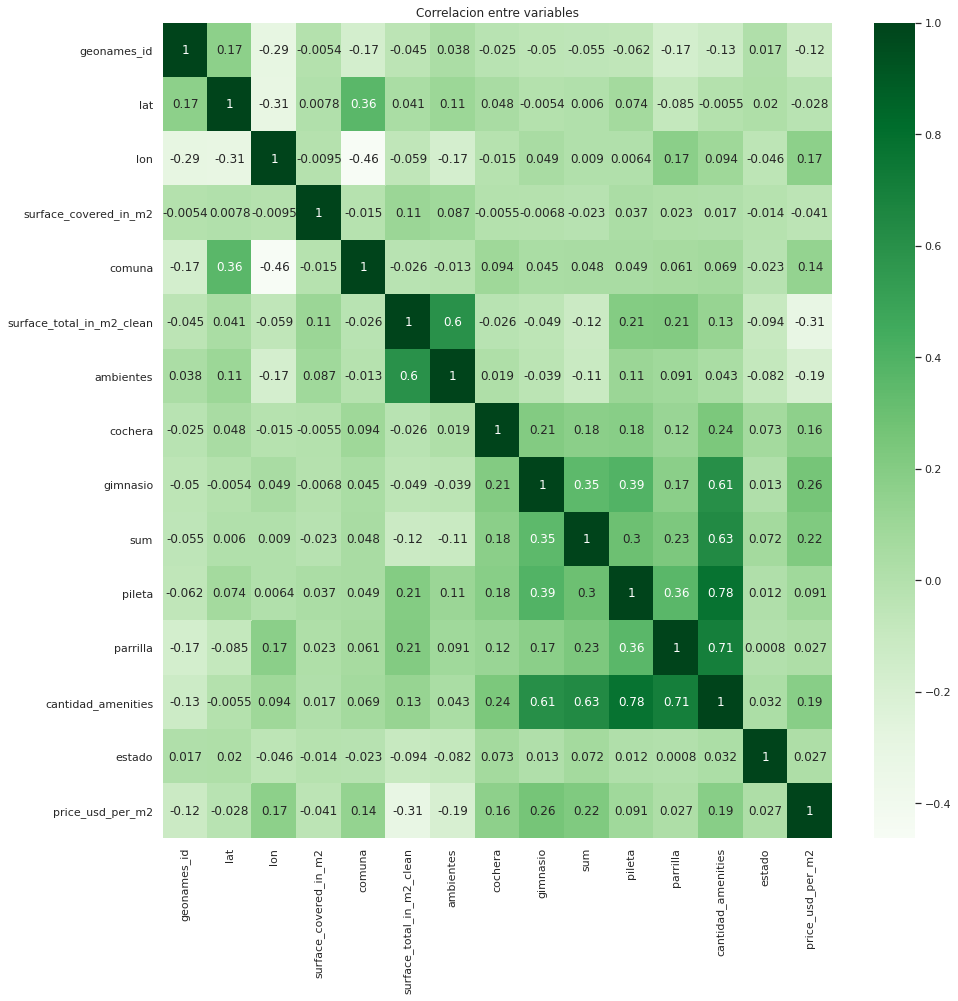

In [323]:
orden_columnas = argentina.drop(columns = 'price_usd_per_m2').columns
orden_columnas = list(orden_columnas)
orden_columnas.append('price_usd_per_m2')
new_argentina = argentina[orden_columnas]


plt.figure(figsize=(15,15))

sns.heatmap(new_argentina.corr(), annot = True, cmap = 'Greens')

plt.title("Correlacion entre variables")
plt.show()

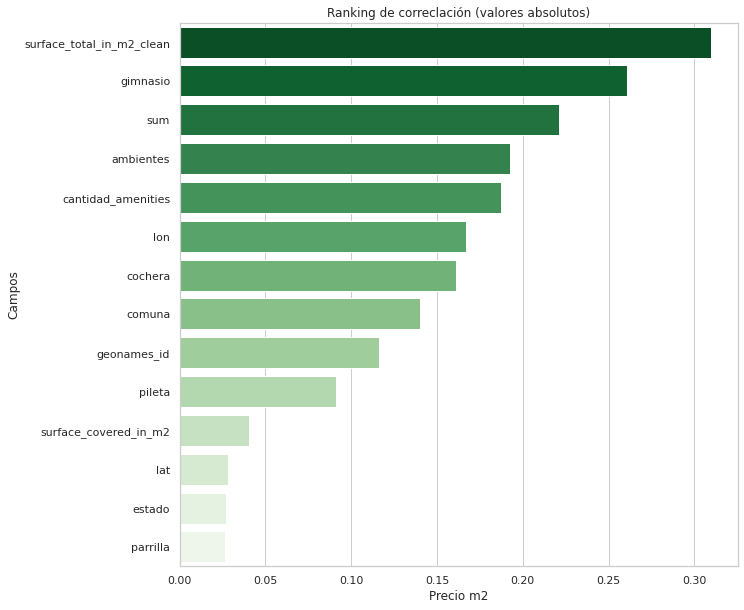

In [324]:
#Ranking de coeficientes de correlación en valores absolutos
plt.figure(figsize=(10,10))

corr_values = abs(new_argentina.corr()).price_usd_per_m2.reset_index().rename(columns = {'index': 'dimension'}).sort_values(ascending = False, by='price_usd_per_m2')
corr_values.drop(index=14, inplace=True)
sns.barplot(x='price_usd_per_m2', y='dimension', data = corr_values, palette='Greens_r')


plt.title("Ranking de correclación (valores absolutos)")
plt.xlabel('Precio m2')
plt.ylabel('Campos')
plt.show()

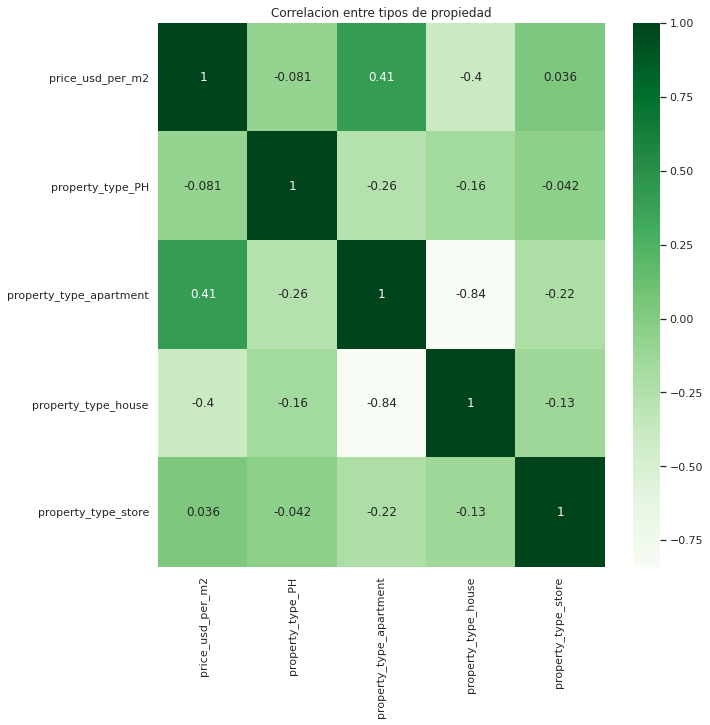

In [325]:
#Correlacion con el tipo de propiedad
property_type_arg = pd.get_dummies(argentina[['property_type', 'price_usd_per_m2']])

plt.figure(figsize=(10,10))

sns.heatmap(property_type_arg.corr(), annot = True, cmap = 'Greens')

plt.title("Correlacion entre tipos de propiedad")
plt.show()

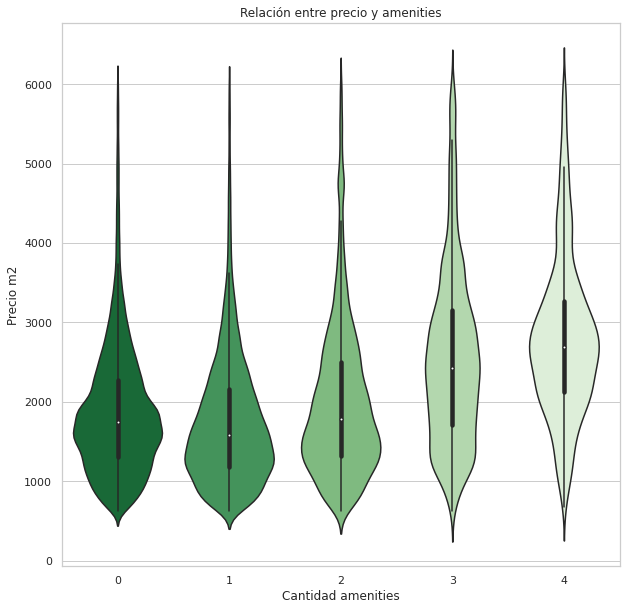

In [326]:
#Relación entre el precio del m2 y los amenities
plt.figure(figsize=(10,10))

sns.violinplot(x='cantidad_amenities', y='price_usd_per_m2', data = argentina, palette='Greens_r')


plt.title("Relación entre precio y amenities")
plt.xlabel('Cantidad amenities')
plt.ylabel('Precio m2')
plt.show()

In [327]:
# Seleccionamos las features y la variable target
X_features = ['surface_total_in_m2_clean', 'ambientes', 'cochera','gimnasio','sum','pileta','parrilla', 'state_name','property_type']
y_target = ['price_usd_per_m2']

# Dropeamos las observaciones que tengan NaN en alguna de las columnas que vamos a usar para entrenar el modelo
features_plus_target = ['surface_total_in_m2_clean','ambientes','cochera','gimnasio','sum','pileta','parrilla' , 'price_usd_per_m2','state_name','property_type']
data_regression = argentina.dropna(subset=features_plus_target)
print('Cantidad de observaciones que nos quedan para entrenar el modelo:', data_regression.shape[0])

Cantidad de observaciones que nos quedan para entrenar el modelo: 99595


In [328]:
Q_datos_modelo_argentina = data_regression.shape[0]
Col_modelo_argentina = data_regression.shape[1]
porc_utilizado = Q_datos_modelo_argentina/data.shape[0]
print("Cantidad de datos utilizados para estimar la regresión de Argentina:", Q_datos_modelo_argentina)
print("Proporción de datos utilizados para estimar la regresión:", porc_utilizado)
print('Porcentaje de columnas utilizadas para estimar la regresion: ', Col_modelo_argentina/ 21)

Cantidad de datos utilizados para estimar la regresión de Argentina: 99595
Proporción de datos utilizados para estimar la regresión: 0.8812936908238209
Porcentaje de columnas utilizadas para estimar la regresion:  0.9047619047619048


In [329]:
# Tomamos nuestra X (features) y nuestra y (target) para el modelo
X = data_regression[X_features]
y = data_regression[y_target]

X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99595 entries, 0 to 118485
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   surface_total_in_m2_clean  99595 non-null  float64
 1   ambientes                  99595 non-null  float64
 2   cochera                    99595 non-null  int64  
 3   gimnasio                   99595 non-null  int64  
 4   sum                        99595 non-null  int64  
 5   pileta                     99595 non-null  int64  
 6   parrilla                   99595 non-null  int64  
 7   state_name                 99595 non-null  object 
 8   property_type              99595 non-null  object 
dtypes: float64(2), int64(5), object(2)
memory usage: 7.6+ MB


In [330]:
# get_dummies para pasar variables categóricas a numéricas
X = pd.get_dummies(X, drop_first=True)

X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99595 entries, 0 to 118485
Data columns (total 35 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   surface_total_in_m2_clean                99595 non-null  float64
 1   ambientes                                99595 non-null  float64
 2   cochera                                  99595 non-null  int64  
 3   gimnasio                                 99595 non-null  int64  
 4   sum                                      99595 non-null  int64  
 5   pileta                                   99595 non-null  int64  
 6   parrilla                                 99595 non-null  int64  
 7   state_name_Bs.As. G.B.A. Zona Oeste      99595 non-null  uint8  
 8   state_name_Bs.As. G.B.A. Zona Sur        99595 non-null  uint8  
 9   state_name_Buenos Aires Costa Atlántica  99595 non-null  uint8  
 10  state_name_Buenos Aires Interior         9959

In [331]:
X['surface_al_cuadrado']=X['surface_total_in_m2_clean']**2

In [332]:
# Separamos en grupos de entrenamiento y testeo
Xtest, Xtrain, ytest, ytrain = train_test_split(X, y, random_state = 1)

# Instanciamos el modelo de regresión lineal
model = LinearRegression()

# Fiteamos el modelo con los grupos de entrenamiento
model.fit(Xtrain, ytrain)

# Hacemos predicciones con los datos de testeo
predictions = model.predict(Xtest)

# Comparamos las predicciones
MSE_test = mean_squared_error(ytest, predictions)
RMSE_test = np.sqrt(mean_squared_error(ytest, predictions))
R2_score_test = r2_score(ytest, predictions)

print('Errores con los datos de testeo:')
print(f'MSE: {MSE_test}')
print(f'RMSE: {RMSE_test}')
print(f'R2 score: {R2_score_test}')

Errores con los datos de testeo:
MSE: 488062.7609789184
RMSE: 698.6148874586902
R2 score: 0.3987546440071833


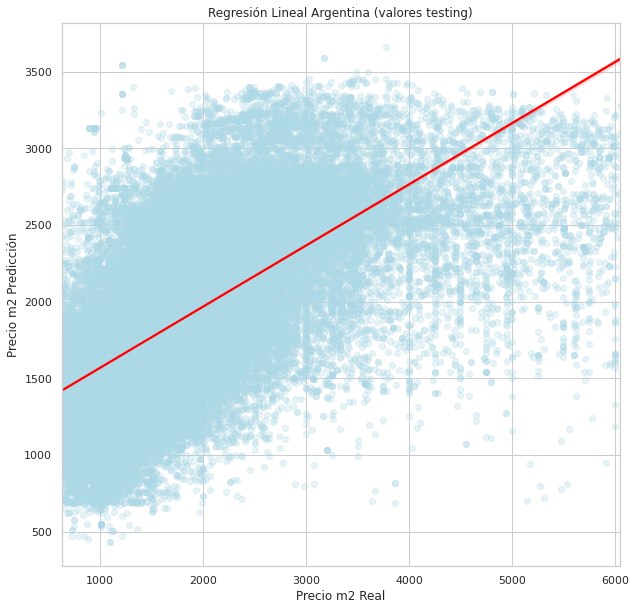

In [333]:
#Regresión para todos los valores de testing
plt.figure(figsize=(10,10))

val_pred = pd.DataFrame(predictions)
val_real = ytest.reset_index(drop=True)
test_values = pd.concat([val_real, val_pred], axis = 1)
test_values.rename(columns = {'price_usd_per_m2': 'real', 0: 'prediccion'}, inplace = True)

sns.regplot(x='real', y='prediccion', data = test_values, scatter_kws={"color": "lightblue", 'alpha':0.3}, line_kws={'color': 'red'})

plt.xlabel('Precio m2 Real')
plt.ylabel('Precio m2 Predicción')
plt.title('Regresión Lineal Argentina (valores testing)')
plt.show()

In [334]:
q_datos_Xtrain_reg_lin_base= Xtrain.shape[0]
prop_Xtrain_base = q_datos_Xtrain_reg_lin_base / data.shape[0]
print("Cantidad de datos utilizados para entrenar el modelo:", q_datos_Xtrain_reg_lin_base)
print("Proporcion de datos utilizados para entrenar el modelo, dentro del Train Test Split:", prop_Xtrain_base)

Cantidad de datos utilizados para entrenar el modelo: 24899
Proporcion de datos utilizados para entrenar el modelo, dentro del Train Test Split: 0.2203256348995664


Tomamos como base el R2 score de 0.398

In [335]:
# Hacemos predicciones con los datos de train
train_predict = model.predict(Xtrain)

# Comparamos las predicciones
MSE_train = mean_squared_error(ytrain, train_predict)
RMSE_train = np.sqrt(mean_squared_error(ytrain, train_predict))
R2_score_train = r2_score(ytrain, train_predict)

print('Errores con los datos de training:')
print(f'MSE: {MSE_train}')
print(f'RMSE: {RMSE_train}')
print(f'R2 score: {R2_score_train}')

Errores con los datos de training:
MSE: 477784.53074088285
RMSE: 691.2195966123088
R2 score: 0.40219120536237984


Para test nos dan números similares


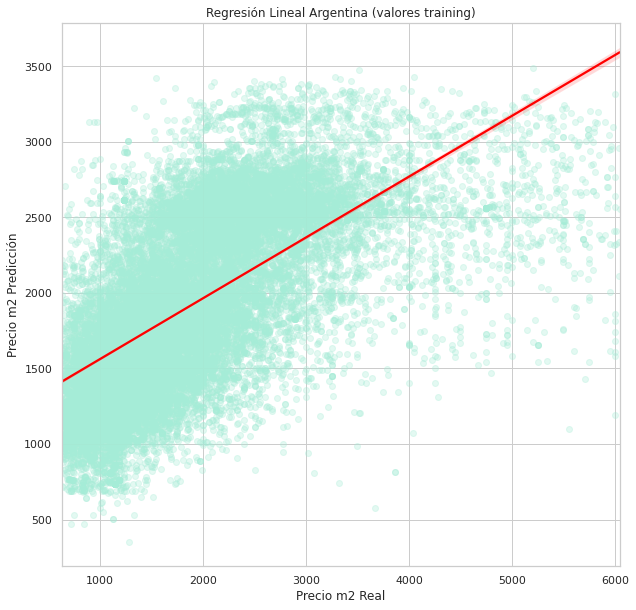

In [336]:
#Regresión para todos los valores de traning
plt.figure(figsize=(10,10))

val_pred = pd.DataFrame(train_predict)
val_real = ytrain.reset_index(drop=True)
full_values = pd.concat([val_real, val_pred], axis = 1)
full_values.rename(columns = {'price_usd_per_m2': 'real', 0: 'prediccion'}, inplace = True)

sns.regplot(x='real', y='prediccion', data = full_values, scatter_kws={"color": "#a5ecd7", 'alpha':0.3}, line_kws={'color': 'red'})

plt.xlabel('Precio m2 Real')
plt.ylabel('Precio m2 Predicción')
plt.title('Regresión Lineal Argentina (valores training)')
plt.show()

#CABA

## Llenado de valores vacíos

In [337]:
caba_mask = data['state_name'] == 'Capital Federal'
caba = data[caba_mask]
caba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30649 entries, 0 to 118485
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   property_type              30649 non-null  object 
 1   state_name                 30649 non-null  object 
 2   geonames_id                29422 non-null  float64
 3   lat                        22938 non-null  float64
 4   lon                        22938 non-null  float64
 5   surface_covered_in_m2      28619 non-null  float64
 6   price_usd_per_m2           29561 non-null  float64
 7   place_name_caba_mayus      30649 non-null  object 
 8   comuna                     30649 non-null  float64
 9   place_name_2               30649 non-null  object 
 10  surface_total_in_m2_clean  29946 non-null  float64
 11  ambientes                  29704 non-null  float64
 12  cochera                    30649 non-null  int64  
 13  gimnasio                   30649 non-null  in

Vemos que también vamos a rellenar los campos:

*   price_usd_per_m2
*   surface_total_in_m2_clean
*   ambientes

###Superficie

In [338]:
# Primero nos fijamos cuántos valores vacíos hay en la columna 'surface_total_in_m2_clean'
caba.surface_total_in_m2_clean.isnull().value_counts()

False    29946
True       703
Name: surface_total_in_m2_clean, dtype: int64

In [339]:
# Imputamos los valores vacíos con la mediana
caba['surface_total_in_m2_clean'] = caba['surface_total_in_m2_clean'].fillna(caba.groupby(['place_name_caba_mayus','ambientes', 'property_type'])['surface_total_in_m2_clean'].transform('median'))

# Volvemos a chequear la cantidad de valores vacíos
caba.surface_total_in_m2_clean.isnull().value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


False    29946
True       703
Name: surface_total_in_m2_clean, dtype: int64

###Ambientes

In [340]:
caba.ambientes.isnull().value_counts()

False    29704
True       945
Name: ambientes, dtype: int64

In [341]:
# Imputamos los valores vacíos con la mediana
caba['ambientes'] = caba['ambientes'].fillna(caba.groupby(['place_name_caba_mayus','surface_total_in_m2_clean', 'property_type'])['ambientes'].transform('median'))

# Volvemos a chequear la cantidad de valores vacíos
caba.ambientes.isnull().value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


False    29704
True       945
Name: ambientes, dtype: int64

### Precio

In [342]:
# Imputamos los valores vacíos con la mediana
caba['price_usd_per_m2'] = caba['price_usd_per_m2'].fillna(caba.groupby(['place_name_caba_mayus','surface_total_in_m2_clean', 'property_type', 'ambientes','cantidad_amenities'])['price_usd_per_m2'].transform('median'))

# Volvemos a chequear la cantidad de valores vacíos
print(caba.price_usd_per_m2.isnull().value_counts())

False    29581
True      1068
Name: price_usd_per_m2, dtype: int64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Le agregamos la variable Surface_al_cuadrado


In [343]:
caba['surface_al_cuadrado']=caba['surface_total_in_m2_clean']**2
caba

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,property_type,state_name,geonames_id,lat,lon,surface_covered_in_m2,price_usd_per_m2,place_name_caba_mayus,comuna,place_name_2,surface_total_in_m2_clean,ambientes,cochera,gimnasio,sum,pileta,parrilla,cantidad_amenities,estado,surface_al_cuadrado
0,PH,Capital Federal,3430787.0,-34.661824,-58.508839,40.0,1127.272727,MATADEROS,9.0,Mataderos,55.0,2.0,0,0,0,0,0,0,0,3025.0
2,apartment,Capital Federal,3430787.0,-34.652262,-58.522982,55.0,1309.090909,MATADEROS,9.0,Mataderos,55.0,2.0,0,0,0,0,0,0,0,3025.0
3,PH,Capital Federal,3431333.0,-34.647797,-58.516424,NaN,1707.317073,LINIERS,9.0,Liniers,82.0,3.0,0,0,0,0,0,0,0,6724.0
7,apartment,Capital Federal,3436077.0,-34.559873,-58.443362,40.0,3066.666667,BELGRANO,13.0,Belgrano,45.0,2.0,0,0,0,1,0,1,0,2025.0
8,apartment,Capital Federal,3436077.0,-34.559873,-58.443362,60.0,3000.000000,BELGRANO,13.0,Belgrano,65.0,3.0,0,0,0,1,0,1,0,4225.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118424,apartment,Capital Federal,3429595.0,-34.587425,-58.397372,39.0,3750.000000,RECOLETA,2.0,Recoleta,44.0,2.0,0,0,0,0,1,1,0,1936.0
118426,apartment,Capital Federal,3436077.0,-34.563685,-58.442683,NaN,2611.464968,BELGRANO,13.0,Belgrano,157.0,5.0,0,0,0,0,0,0,0,24649.0
118481,apartment,Capital Federal,3436077.0,NaN,NaN,93.0,2699.115044,BELGRANO,13.0,Belgrano,113.0,3.0,1,0,0,1,1,2,0,12769.0
118483,apartment,Capital Federal,3433775.0,-34.570639,-58.475596,39.0,2858.695652,VILLA URQUIZA,12.0,Villa Urquiza,46.0,2.0,1,0,0,0,1,1,0,2116.0


## Regresión lineal

In [344]:
caba.head()

,property_type,state_name,geonames_id,lat,lon,surface_covered_in_m2,price_usd_per_m2,place_name_caba_mayus,comuna,place_name_2,surface_total_in_m2_clean,ambientes,cochera,gimnasio,sum,pileta,parrilla,cantidad_amenities,estado,surface_al_cuadrado
0,PH,Capital Federal,3430787.0,-34.661824,-58.508839,40.0,1127.272727,MATADEROS,9.0,Mataderos,55.0,2.0,0,0,0,0,0,0,0,3025.0
2,apartment,Capital Federal,3430787.0,-34.652262,-58.522982,55.0,1309.090909,MATADEROS,9.0,Mataderos,55.0,2.0,0,0,0,0,0,0,0,3025.0
3,PH,Capital Federal,3431333.0,-34.647797,-58.516424,NaN,1707.317073,LINIERS,9.0,Liniers,82.0,3.0,0,0,0,0,0,0,0,6724.0
7,apartment,Capital Federal,3436077.0,-34.559873,-58.443362,40.0,3066.666667,BELGRANO,13.0,Belgrano,45.0,2.0,0,0,0,1,0,1,0,2025.0
8,apartment,Capital Federal,3436077.0,-34.559873,-58.443362,60.0,3000.000000,BELGRANO,13.0,Belgrano,65.0,3.0,0,0,0,1,0,1,0,4225.0


In [345]:
caba.corr()

,geonames_id,lat,lon,surface_covered_in_m2,price_usd_per_m2,comuna,surface_total_in_m2_clean,ambientes,cochera,gimnasio,sum,pileta,parrilla,cantidad_amenities,estado,surface_al_cuadrado
geonames_id,1.000000,-0.037834,0.118516,-0.000940,-0.102395,-0.166893,-0.021385,0.009118,-0.079781,-0.048313,-0.045416,-0.079836,-0.067059,-0.082672,-0.038196,-0.022945
lat,-0.037834,1.000000,0.397825,-0.001069,0.289815,0.362418,0.015187,0.010279,0.110857,0.073581,0.066536,0.096251,0.038876,0.091765,-0.023166,0.011116
lon,0.118516,0.397825,1.000000,0.007407,0.168323,-0.462700,0.032065,0.040206,-0.020050,0.090899,-0.000708,0.032973,-0.092329,0.001119,-0.016894,0.033491
surface_covered_in_m2,-0.000940,-0.001069,0.007407,1.000000,-0.007216,-0.015244,0.062028,0.053644,0.013089,-0.003903,-0.015793,-0.002095,-0.004587,-0.008960,-0.009296,0.056755
price_usd_per_m2,-0.102395,0.289815,0.168323,-0.007216,1.000000,0.139756,-0.102493,-0.052696,0.231272,0.296662,0.164183,0.239273,0.029003,0.232844,0.003438,-0.106537
comuna,-0.166893,0.362418,-0.462700,-0.015244,0.139756,1.000000,-0.026181,-0.013161,0.094010,0.045332,0.047569,0.048516,0.060814,0.068977,-0.022681,-0.033752
surface_total_in_m2_clean,-0.021385,0.015187,0.032065,0.062028,-0.102493,-0.026181,1.000000,0.728102,0.124428,0.007030,-0.147843,0.006638,0.021581,-0.038093,-0.093755,0.957657
ambientes,0.009118,0.010279,0.040206,0.053644,-0.052696,-0.013161,0.728102,1.000000,0.106421,-0.009662,-0.177018,-0.061283,-0.074533,-0.113225,-0.121750,0.641049
cochera,-0.079781,0.110857,-0.020050,0.013089,0.231272,0.094010,0.124428,0.106421,1.000000,0.261193,0.194145,0.263627,0.211720,0.311816,0.091616,0.100633
gimnasio,-0.048313,0.073581,0.090899,-0.003903,0.296662,0.045332,0.007030,-0.009662,0.261193,1.000000,0.345962,0.538964,0.230286,0.669327,0.036449,-0.004562


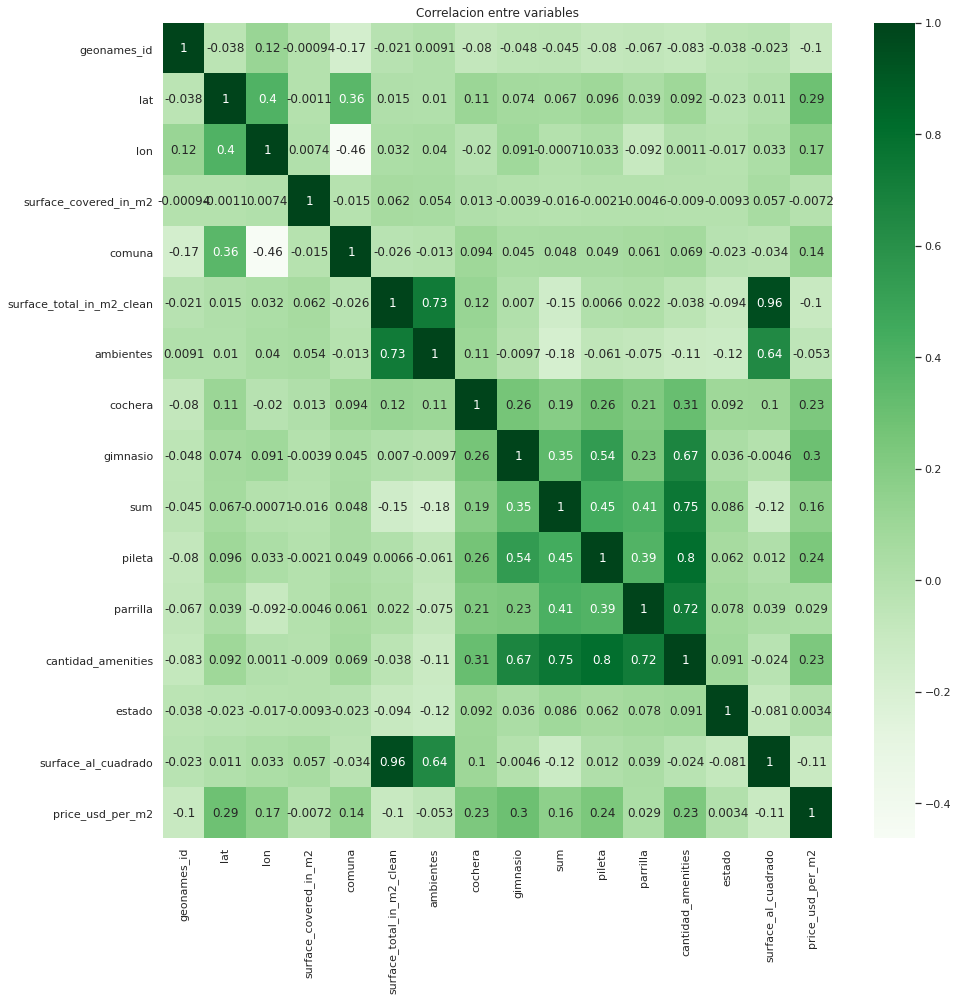

In [346]:
orden_columnas = caba.drop(columns = 'price_usd_per_m2').columns
orden_columnas = list(orden_columnas)
orden_columnas.append('price_usd_per_m2')
new_caba = caba[orden_columnas]


plt.figure(figsize=(15,15))

sns.heatmap(new_caba.corr(), annot = True, cmap = 'Greens')

plt.title("Correlacion entre variables")
plt.show()

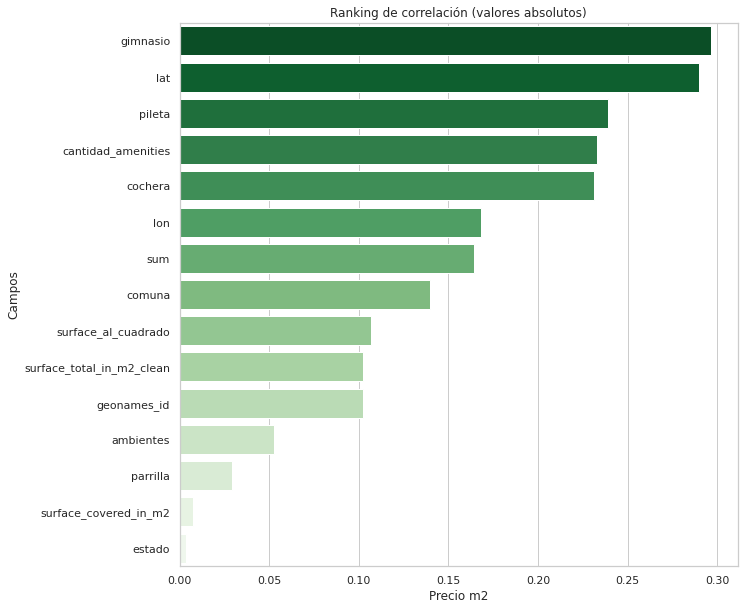

In [347]:
#Ranking de coeficientes de correlación en valores absolutos
plt.figure(figsize=(10,10))

corr_values = abs(new_caba.corr()).price_usd_per_m2.reset_index().rename(columns = {'index': 'dimension'}).sort_values(ascending = False, by='price_usd_per_m2')
corr_values.drop(index=15, inplace=True)

sns.barplot(x='price_usd_per_m2', y='dimension', data = corr_values, palette='Greens_r')


plt.title("Ranking de correlación (valores absolutos)")
plt.xlabel('Precio m2')
plt.ylabel('Campos')
plt.show()

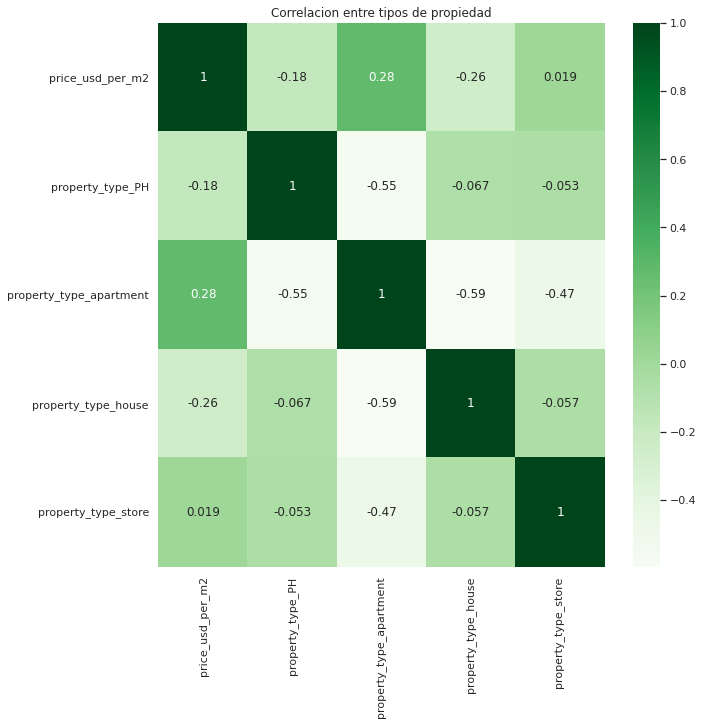

In [348]:
#Correlacion con el tipo de propiedad
property_type_caba = pd.get_dummies(caba[['property_type', 'price_usd_per_m2']])

plt.figure(figsize=(10,10))

sns.heatmap(property_type_caba.corr(), annot = True, cmap = 'Greens')

plt.title("Correlacion entre tipos de propiedad")
plt.show()

In [349]:
#Armamos una función base que entrene y mida la performance del modelo pasado por parámetro

def regression_base(X_features, df, model, coef=0, columns=None):
  print(X_features)
  y_target = ['price_usd_per_m2']

  # Dropeamos las observaciones que tengan NaN en alguna de las columnas que vamos a usar para entrenar el modelo
  features_plus_target = X_features+y_target
  data_regression = caba.dropna(subset=features_plus_target)
  print('Cantidad de datos: '+str(data_regression.shape))
  #print('Proporcion de Datos de CABA utilizado para el modelo:' +str(data_regression.shape / caba.shape[0]))
  #print('Proporcion de Datos de CABA utilizados de todo argentina:' +str(data_regression.shape / data.shape[0]))

  # Tomamos nuestra X (features) y nuestra y (target) para el modelo
  X = data_regression[X_features]
  y = data_regression[y_target]

  X = pd.get_dummies(X, columns=columns, drop_first=True)
  
  
  # Separamos en grupos de entrenamiento y testeo
  Xtest, Xtrain, ytest, ytrain = train_test_split(X, y, random_state = 1)

  #print('Proporcion de Datos Utilizados para entrenar el modelo: ' Xtrain.shape[0]/caba.shape[0])

  # Instanciamos el modelo de regresión lineal

  # Fiteamos el modelo con los grupos de entrenamiento
  model.fit(Xtrain, ytrain)

  # Hacemos predicciones con los datos de testeo
  predictions = model.predict(Xtest)

  #print('coef: '+str(model.coef_))

  # Comparamos las predicciones 
  print('MSE: '+str(mean_squared_error(ytest, predictions)))
  print('RMSE: '+str(np.sqrt(mean_squared_error(ytest, predictions))))
  print('R2: '+str(r2_score(ytest, predictions)))
  print('--------------------')

  # Si se pasa por parámetro coef=1 se imprimen los coeficientes
  if(coef==1):
    coeficientes = list(zip(Xtrain.columns, model.coef_))
    coeficientes_df = pd.DataFrame(data=coeficientes, columns=['Variable', 'Coeficiente'])
    coeficientes_df.sort_values(by='Coeficiente', ascending=False, inplace=True)
    coeficientes_df = coeficientes_df.reset_index(drop=True)
    print('DataFrame con todos los coeficientes ordenados de mayor a menor:')
    print(coeficientes_df)
    print('')
    print('Las 5 variables con coeficiente positivo de más peso son: ')
    print(coeficientes_df.iloc[0:5])
    print('')
    print('Las 5 variables con coeficiente negativo de más peso son:')
    length_df = coeficientes_df.shape[0]
    index_df_from = length_df - 5
    print(coeficientes_df.iloc[index_df_from:length_df])
    print('')
    print('Las variables con coeficiente igual a 0 son:')
    mask_coef_0 = coeficientes_df.Coeficiente == 0
    print(coeficientes_df[mask_coef_0])
    
    print('')
    best_coeficientes = pd.concat([coeficientes_df.iloc[0:5], coeficientes_df.iloc[index_df_from:length_df]])
    plt.figure(figsize=(10,10))
    g = sns.barplot(data=best_coeficientes, y='Variable', x='Coeficiente')
    g.set_xticklabels(g.get_xticklabels())
  
  
  return 

###Regresión Lineal Múltiple
Probamos regresiones múltiples tomando distintas features

In [350]:
X_features_1 = ['property_type','surface_total_in_m2_clean', 'ambientes', 'cantidad_amenities',
              'place_name_caba_mayus','comuna','surface_al_cuadrado']
X_features_2 = ['property_type','surface_total_in_m2_clean', 'ambientes', 'parrilla','sum','cochera','gimnasio','pileta',
              'place_name_caba_mayus','comuna','surface_al_cuadrado']
X_features_3 = ['property_type','surface_total_in_m2_clean', 'ambientes', 'parrilla','sum','cochera','gimnasio','pileta',
              'place_name_2','comuna','surface_al_cuadrado']
X_features_4 = ['property_type','surface_total_in_m2_clean', 'ambientes', 'parrilla','sum','cochera','gimnasio','pileta',
              'place_name_2','comuna','estado','surface_al_cuadrado']
X_features_5 = ['property_type','surface_total_in_m2_clean', 'ambientes', 'parrilla','sum','cochera','gimnasio','pileta',
              'place_name_2','comuna','estado','geonames_id','surface_al_cuadrado']
X_features_6 = ['property_type','surface_total_in_m2_clean', 'ambientes', 'parrilla','sum','cochera','gimnasio','pileta',
              'place_name_2','comuna','estado','lat','lon','surface_al_cuadrado']  
                               
regression_base(X_features_1,caba,LinearRegression())
regression_base(X_features_2,caba,LinearRegression())
regression_base(X_features_3,caba,LinearRegression())
regression_base(X_features_3,caba,LinearRegression(),0,['property_type','place_name_2','comuna'])#Probamos forzar que haga dummies a comuna
regression_base(X_features_4,caba,LinearRegression())
regression_base(X_features_5,caba,LinearRegression())
regression_base(X_features_6,caba,LinearRegression())

['property_type', 'surface_total_in_m2_clean', 'ambientes', 'cantidad_amenities', 'place_name_caba_mayus', 'comuna', 'surface_al_cuadrado']
Cantidad de datos: (29021, 20)
MSE: 472582.78761038836
RMSE: 687.4465707314193
R2: 0.4740057379616439
--------------------
['property_type', 'surface_total_in_m2_clean', 'ambientes', 'parrilla', 'sum', 'cochera', 'gimnasio', 'pileta', 'place_name_caba_mayus', 'comuna', 'surface_al_cuadrado']
Cantidad de datos: (29021, 20)
MSE: 456426.1622430706
RMSE: 675.5931928631835
R2: 0.4919883908637609
--------------------
['property_type', 'surface_total_in_m2_clean', 'ambientes', 'parrilla', 'sum', 'cochera', 'gimnasio', 'pileta', 'place_name_2', 'comuna', 'surface_al_cuadrado']
Cantidad de datos: (29021, 20)
MSE: 455391.863931503
RMSE: 674.8272845191598
R2: 0.4931395859376896
--------------------
['property_type', 'surface_total_in_m2_clean', 'ambientes', 'parrilla', 'sum', 'cochera', 'gimnasio', 'pileta', 'place_name_2', 'comuna', 'surface_al_cuadrado']
Ca

['property_type', 'surface_total_in_m2_clean', 'ambientes', 'parrilla', 'sum', 'cochera', 'gimnasio', 'pileta', 'place_name_2', 'comuna', 'estado', 'surface_al_cuadrado']
Cantidad de datos: (29021, 20)
MSE: 455072.31031482975
RMSE: 674.590476003649
R2: 0.49349525561756435
--------------------


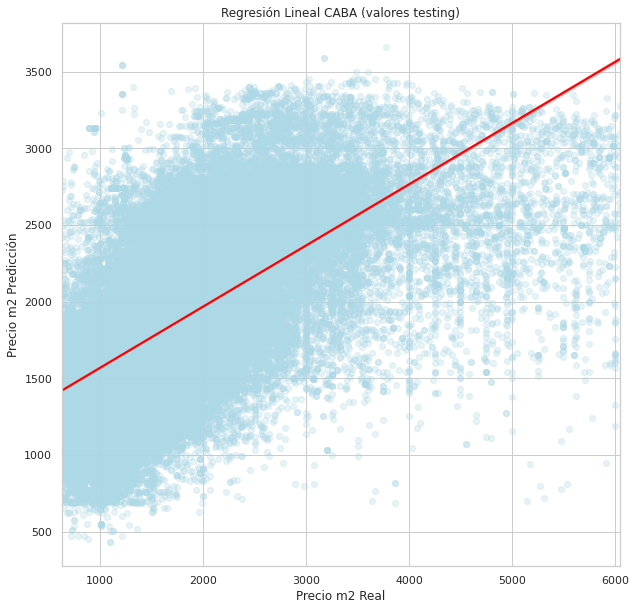

In [351]:
#Regresión para todos los valores de testing
lr=LinearRegression()
regression_base(X_features_4,caba,lr)

plt.figure(figsize=(10,10))

val_pred = pd.DataFrame(predictions)
val_real = ytest.reset_index(drop=True)
test_values_caba = pd.concat([val_real, val_pred], axis = 1)
test_values_caba.rename(columns = {'price_usd_per_m2': 'real', 0: 'prediccion'}, inplace = True)
test_values_caba
sns.regplot(x='real', y='prediccion', data = test_values_caba, scatter_kws={"color": "lightblue", 'alpha':0.3}, line_kws={'color': 'red'})

plt.xlabel('Precio m2 Real')
plt.ylabel('Precio m2 Predicción')
plt.title('Regresión Lineal CABA (valores testing)')
plt.show()

MSE: 477784.53074088285
RMSE: 691.2195966123088
R2: 0.40219120536237984
--------------------


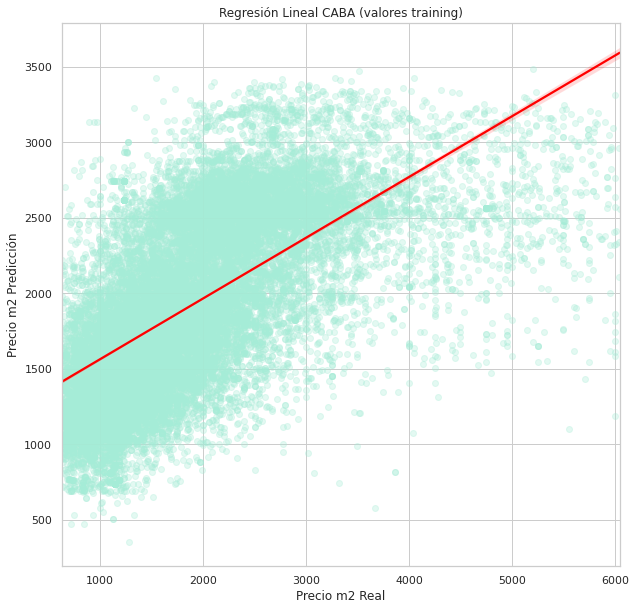

In [352]:
train_predict_caba = model.predict(Xtrain)

# Comparamos las predicciones 
print('MSE: '+str(mean_squared_error(ytrain, train_predict_caba)))
print('RMSE: '+str(np.sqrt(mean_squared_error(ytrain, train_predict_caba))))
print('R2: '+str(r2_score(ytrain, train_predict_caba)))
print('--------------------')

plt.figure(figsize=(10,10))

val_pred = pd.DataFrame(train_predict_caba)
val_real = ytrain.reset_index(drop=True)
train_values_caba = pd.concat([val_real, val_pred], axis = 1)
train_values_caba.rename(columns = {'price_usd_per_m2': 'real', 0: 'prediccion'}, inplace = True)

sns.regplot(x='real', y='prediccion', data = train_values_caba, scatter_kws={"color": "#a5ecd7", 'alpha':0.3}, line_kws={'color': 'red'})

plt.xlabel('Precio m2 Real')
plt.ylabel('Precio m2 Predicción')
plt.title('Regresión Lineal CABA (valores training)')
plt.show()

**Conclusión parcial:** Nos quedó como mejor modelo con un score de 0.4934 aquel que entrenamos con las features: 

*   property_type
*   surface_total_in_m2_clean
*   ambientes
*   parrilla
*   sum
*   cochera
*   gimnasio
*   pileta
*   place_name_2
*   comuna
*   estado
*   surface_al_cuadrado

###Cross Validation Ridge Regression
Probamos la misma combinación de variables que para las regresiones múltiples con Ridge Regression.

In [353]:
from sklearn import linear_model

rlmcv = linear_model.RidgeCV(alphas=np.linspace(0.1,100, 1000), cv=3, normalize=True,scoring='r2')

regression_base(X_features_1,caba,rlmcv)
regression_base(X_features_2,caba,rlmcv)
regression_base(X_features_3,caba,rlmcv)
regression_base(X_features_3,caba,rlmcv,0,['property_type','place_name_2','comuna'])#Probamos forzar que haga dummies a comuna
regression_base(X_features_4,caba,rlmcv)
regression_base(X_features_5,caba,rlmcv)
regression_base(X_features_6,caba,rlmcv)

['property_type', 'surface_total_in_m2_clean', 'ambientes', 'cantidad_amenities', 'place_name_caba_mayus', 'comuna', 'surface_al_cuadrado']
Cantidad de datos: (29021, 20)
MSE: 478791.5419685739
RMSE: 691.9476439504465
R2: 0.4670952679817182
--------------------
['property_type', 'surface_total_in_m2_clean', 'ambientes', 'parrilla', 'sum', 'cochera', 'gimnasio', 'pileta', 'place_name_caba_mayus', 'comuna', 'surface_al_cuadrado']
Cantidad de datos: (29021, 20)
MSE: 463240.24612966494
RMSE: 680.6175476210299
R2: 0.4844041767972268
--------------------
['property_type', 'surface_total_in_m2_clean', 'ambientes', 'parrilla', 'sum', 'cochera', 'gimnasio', 'pileta', 'place_name_2', 'comuna', 'surface_al_cuadrado']
Cantidad de datos: (29021, 20)
MSE: 462075.35667445004
RMSE: 679.7612497593916
R2: 0.48570072247221896
--------------------
['property_type', 'surface_total_in_m2_clean', 'ambientes', 'parrilla', 'sum', 'cochera', 'gimnasio', 'pileta', 'place_name_2', 'comuna', 'surface_al_cuadrado']

**Conclusión parcial:** 

Los r2 dan apenas menores para Ridge Regression en comparación con la regresión lineal múltiple. El r2 más alto de esta sección sigue siendo menor que la más alta de la Regresión Múltiple.

Consideramos que da menor porque el modelo es una regresión lineal por lo que no llega a overfittear los datos por tratarse de un modelo muy simple. Estamos queriendo describir de forma lineal datos que representan patrones más complejos.

###Cross Validation Lasso Regression
Probamos con más variables que las pruebas de los modelos anteriores para Lasso Regression ya que tiene la capacidad de seleccionar variables.

In [354]:
lassocv = linear_model.LassoCV(alphas=np.linspace(0.01,100, 1000), cv=3, normalize=True)

X_features_6=['property_type', 'geonames_id', 'lat', 'lon',
       'place_name_caba_mayus', 'comuna', 'place_name_2', 'surface_total_in_m2_clean', 'ambientes',
       'cochera', 'gimnasio', 'sum', 'pileta', 'parrilla', 'estado', 'surface_al_cuadrado']
X_features_7=['property_type', 
       'place_name_caba_mayus', 'comuna', 'place_name_2', 'surface_total_in_m2_clean', 'ambientes',
       'cochera', 'gimnasio', 'sum', 'pileta', 'parrilla', 'estado', 'surface_al_cuadrado']

regression_base(X_features_6,caba,lassocv)
regression_base(X_features_7,caba,lassocv)
regression_base(X_features_3,caba,lassocv,0,['property_type','place_name_2','comuna'])#Probamos forzar que haga dummies a comuna
regression_base(X_features_6,caba,lassocv,0,['property_type','place_name_2','comuna','place_name_caba_mayus'])#Probamos forzar que haga dummies a comuna


['property_type', 'geonames_id', 'lat', 'lon', 'place_name_caba_mayus', 'comuna', 'place_name_2', 'surface_total_in_m2_clean', 'ambientes', 'cochera', 'gimnasio', 'sum', 'pileta', 'parrilla', 'estado', 'surface_al_cuadrado']
Cantidad de datos: (20915, 20)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 591832.773321867, tolerance: 283587.5697639737
  tol, rng, random, positive)


MSE: 380633.8148567443
RMSE: 616.9552778417122
R2: 0.5353367486613683
--------------------
['property_type', 'place_name_caba_mayus', 'comuna', 'place_name_2', 'surface_total_in_m2_clean', 'ambientes', 'cochera', 'gimnasio', 'sum', 'pileta', 'parrilla', 'estado', 'surface_al_cuadrado']
Cantidad de datos: (29021, 20)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MSE: 455186.37764068594
RMSE: 674.675016315771
R2: 0.4933682963620447
--------------------
['property_type', 'surface_total_in_m2_clean', 'ambientes', 'parrilla', 'sum', 'cochera', 'gimnasio', 'pileta', 'place_name_2', 'comuna', 'surface_al_cuadrado']
Cantidad de datos: (29021, 20)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1625838.6545524597, tolerance: 656386.9716868642
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MSE: 455499.38473445957
RMSE: 674.9069452409418
R2: 0.4930199130954117
--------------------
['property_type', 'geonames_id', 'lat', 'lon', 'place_name_caba_mayus', 'comuna', 'place_name_2', 'surface_total_in_m2_clean', 'ambientes', 'cochera', 'gimnasio', 'sum', 'pileta', 'parrilla', 'estado', 'surface_al_cuadrado']
Cantidad de datos: (20915, 20)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 375243.2020895481, tolerance: 283587.5697639737
  tol, rng, random, positive)


MSE: 385726.8882610641
RMSE: 621.069149339318
R2: 0.5291193187983694
--------------------


['property_type', 'geonames_id', 'lat', 'lon', 'place_name_caba_mayus', 'comuna', 'place_name_2', 'surface_total_in_m2_clean', 'ambientes', 'cochera', 'gimnasio', 'sum', 'pileta', 'parrilla', 'estado', 'surface_al_cuadrado']
Cantidad de datos: (20915, 20)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 591832.773321867, tolerance: 283587.5697639737
  tol, rng, random, positive)


MSE: 380633.8148567443
RMSE: 616.9552778417122
R2: 0.5353367486613683
--------------------


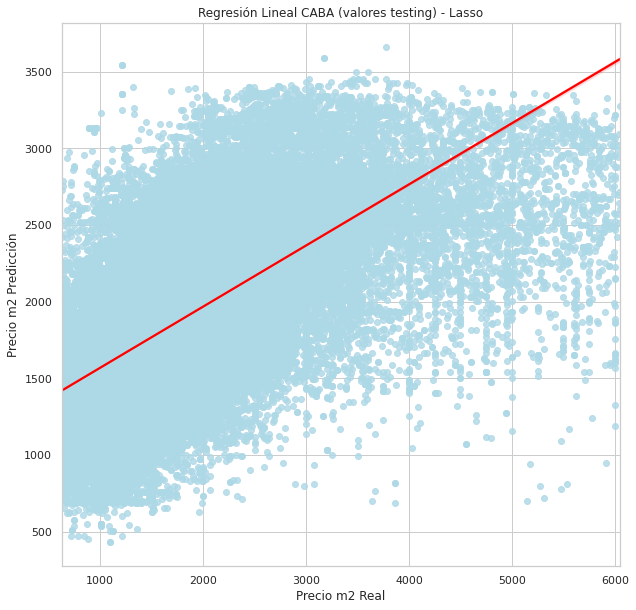

In [355]:
#Regresión para todos los valores de testing
regression_base(X_features_6,caba,lassocv)

plt.figure(figsize=(10,10))

val_pred = pd.DataFrame(predictions)
val_real = ytest.reset_index(drop=True)
test_values_caba_lasso = pd.concat([val_real, val_pred], axis = 1)
test_values_caba_lasso.rename(columns = {'price_usd_per_m2': 'real', 0: 'prediccion'}, inplace = True)
test_values_caba_lasso
sns.regplot(x='real', y='prediccion', data = test_values_caba_lasso, scatter_kws={"color": "lightblue"}, line_kws={'color': 'red'})

plt.xlabel('Precio m2 Real')
plt.ylabel('Precio m2 Predicción')
plt.title('Regresión Lineal CABA (valores testing) - Lasso')
plt.show()

**Conclusión parcial:** Para esta prueba nos dieron valores más altos que el R2 de 0.4934 de la Regresión Lineal Múltiple. El mayor R2 obtenido es 0.5353.
Creemos que mejora porque puede seleccionar variables inclusive entre las variables generadas por el get_dummies. 

Procedemos a analizar el mejor modelo para ver sus coeficientes.

####Análisis Modelo Final

['property_type', 'geonames_id', 'lat', 'lon', 'place_name_caba_mayus', 'comuna', 'place_name_2', 'surface_total_in_m2_clean', 'ambientes', 'cochera', 'gimnasio', 'sum', 'pileta', 'parrilla', 'estado', 'surface_al_cuadrado']
Cantidad de datos: (20915, 20)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 591832.773321867, tolerance: 283587.5697639737
  tol, rng, random, positive)


MSE: 380633.8148567443
RMSE: 616.9552778417122
R2: 0.5353367486613683
--------------------
DataFrame con todos los coeficientes ordenados de mayor a menor:
                                Variable  Coeficiente
0    place_name_caba_mayus_PUERTO MADERO  2373.966092
1         place_name_caba_mayus_RECOLETA   761.763937
2                    property_type_store   749.822116
3                                    lat   682.606500
4          place_name_caba_mayus_PALERMO   534.555069
..                                   ...          ...
109  place_name_caba_mayus_VILLA SOLDATI  -259.895185
110      place_name_caba_mayus_VERSALLES  -270.606227
111           place_name_caba_mayus_BOCA  -375.184040
112  place_name_caba_mayus_NUEVA POMPEYA  -439.624247
113   place_name_caba_mayus_VILLA LUGANO  -492.879637

[114 rows x 2 columns]

Las 5 variables con coeficiente positivo de más peso son: 
                              Variable  Coeficiente
0  place_name_caba_mayus_PUERTO MADERO  2373.966092
1       

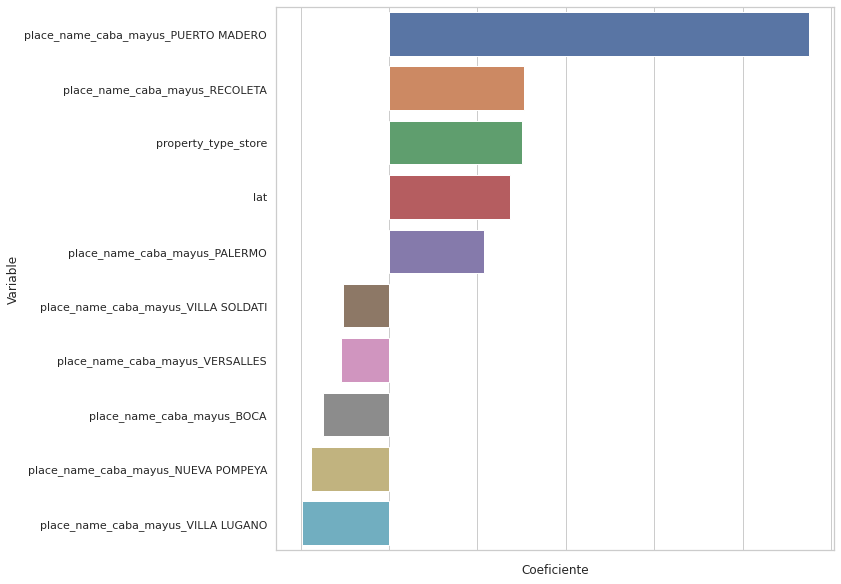

In [356]:
regression_base(X_features_6,caba,lassocv,1)

In [357]:
caba.shape[0]

30649

Se toman 20915 datos del total de datos de caba de 30649, es decir un 68% de los datos.

En el gráfico de barras plasmado, se pueden apreciar los 5 atributos con mayor peso en el modelo en cuanto a su correlación positiva y su correlación negativa. Por consiguiente vemos que Puerto Madero y Recoleta infieren mucho en el aumento del precio mientras que Lugano y Nueva Pompeya correlacionan de forma negativa con respecto a la variable target.

# Muestra de 100 propiedades

In [358]:
y_target = ['price_usd_per_m2']
features_plus_target = X_features_6+y_target
caba_not_null=caba.dropna(subset=features_plus_target)

caba_not_null = pd.get_dummies(caba_not_null[features_plus_target], drop_first=True)

sample = caba_not_null.sample(n=100, random_state=1)

X_sample=sample.drop(columns=y_target)
y_real=sample[y_target]

y_pred=lassocv.predict(X_sample)
y_pred=np.array(y_pred).reshape(-1,1)


dif=y_real-y_pred

dif

,price_usd_per_m2
17914,154.294382
37541,-350.504543
113695,296.412381
108112,311.987838
31920,78.527954
...,...
9010,1205.847452
37042,381.415105
52185,205.328610
46880,1046.024606


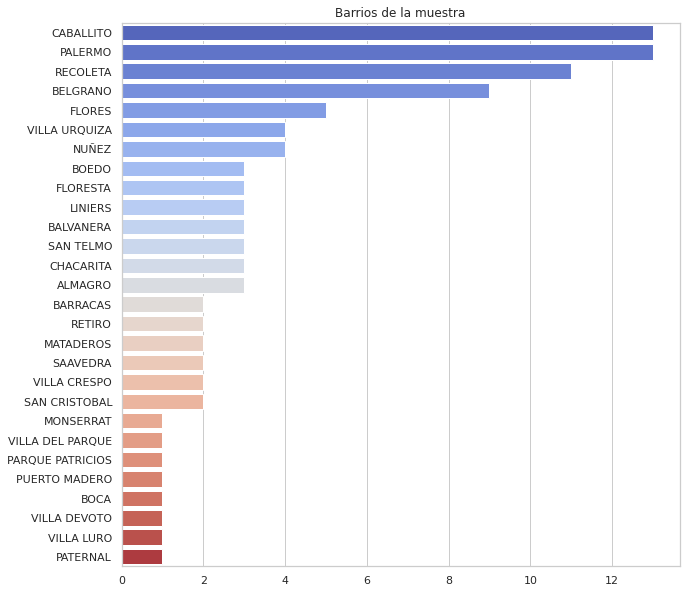

In [359]:
plt.figure(figsize=(10,10))

data_muestra = caba.loc[sample.index]

sns.countplot(y="place_name_caba_mayus", data=data_muestra, order = data_muestra['place_name_caba_mayus'].value_counts().index, palette='coolwarm')

plt.title("Barrios de la muestra")
plt.xlabel('')
plt.ylabel('')
plt.show()

In [360]:
min=dif.price_usd_per_m2.min()
max=dif.price_usd_per_m2.max()
rango=[min-1,-100,100,max]
dif['evaluacion']=pd.cut(dif.price_usd_per_m2,bins=rango,labels=['Subvaluado','Sin diferencia significativa','Sobrevaluado'])
dif.evaluacion.value_counts()

Subvaluado                      46
Sobrevaluado                    38
Sin diferencia significativa    16
Name: evaluacion, dtype: int64

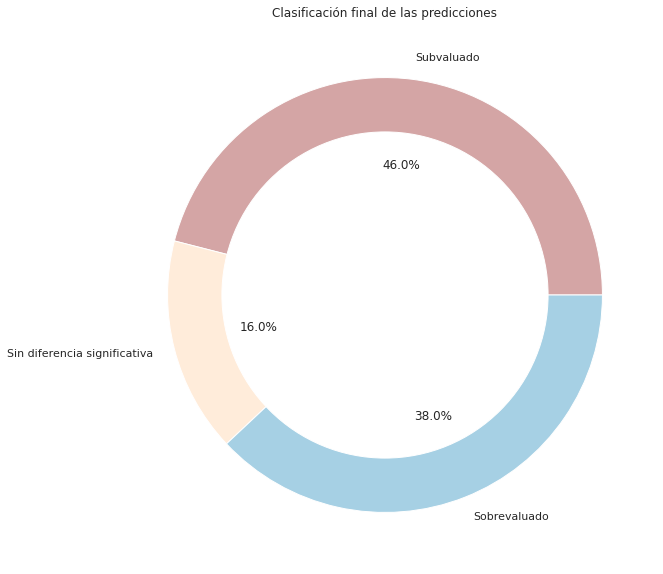

In [361]:
#Clasificación de la valuación del inmueble
fig1, ax1 = plt.subplots(figsize=(10,10))
colors = ['#d4a5a5', '#ffecda', '#a6d0e4']

df2=dif.groupby('evaluacion').count()
ax1.pie(df2.price_usd_per_m2, autopct='%1.1f%%', labels = df2.index, colors=colors)
plt.title("Clasificación final de las predicciones")

centre_circle = plt.Circle((0,0),0.75,color='white', fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.show()

Vemos la distribución de las diferencias entre lo predicho y el valor el real

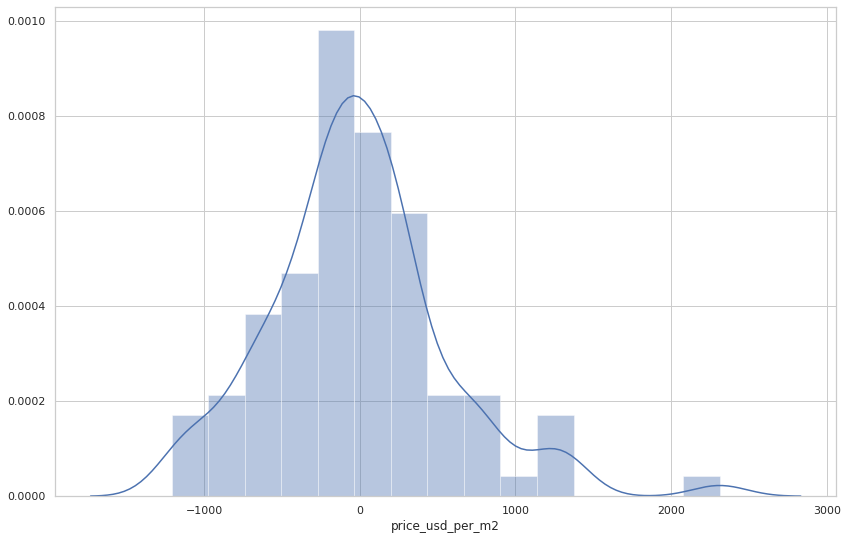

In [362]:
sns.distplot(dif['price_usd_per_m2'])

In [363]:
dif.describe()

,price_usd_per_m2
count,100.000000
mean,-10.157876
std,582.067001
min,-1207.684316
25%,-325.056277
50%,-56.178539
75%,230.863267
max,2311.658912


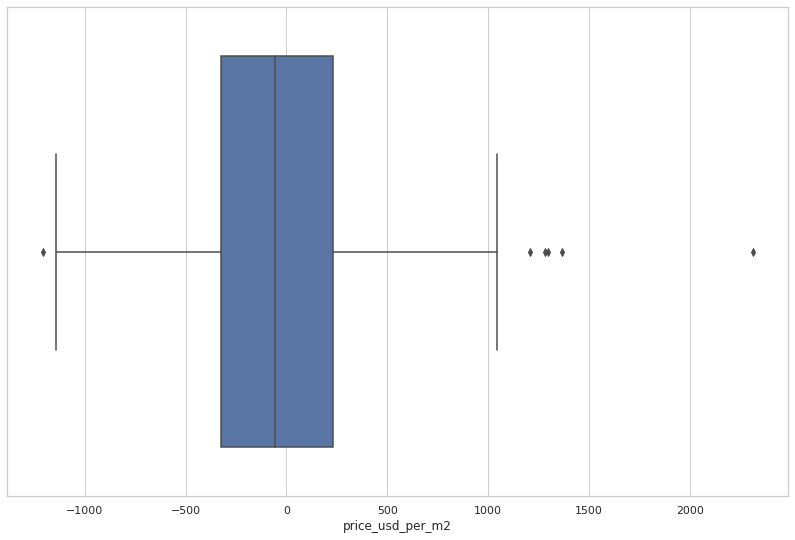

In [364]:
sns.boxplot(dif['price_usd_per_m2'])

Vemos que los valores negativos se dan cuando el modelo subvalua mientras que los valores positivos de diferencias se dan cuando el modelo sobrevalua.

Las diferencias están dando entre -1000 y 1000 mayormente exceptuando unos pocos casos con mayor diferencias. Puede ser que estos departamentos con diferencias mayores no sean representativos del común de su barrio con sus características.

Analizamos estos casos:

In [365]:
mask_outliers=(dif.price_usd_per_m2<-1000) | (dif.price_usd_per_m2>1000)
sample[mask_outliers]

,geonames_id,lat,lon,comuna,surface_total_in_m2_clean,ambientes,cochera,gimnasio,sum,pileta,parrilla,estado,surface_al_cuadrado,price_usd_per_m2,property_type_apartment,property_type_house,property_type_store,place_name_caba_mayus_ALMAGRO,place_name_caba_mayus_BALVANERA,place_name_caba_mayus_BARRACAS,place_name_caba_mayus_BELGRANO,place_name_caba_mayus_BOCA,place_name_caba_mayus_BOEDO,place_name_caba_mayus_CABALLITO,place_name_caba_mayus_CHACARITA,place_name_caba_mayus_COGHLAN,place_name_caba_mayus_COLEGIALES,place_name_caba_mayus_CONSTITUCION,place_name_caba_mayus_FLORES,place_name_caba_mayus_FLORESTA,place_name_caba_mayus_LINIERS,place_name_caba_mayus_MATADEROS,place_name_caba_mayus_MONSERRAT,place_name_caba_mayus_MONTE CASTRO,place_name_caba_mayus_NUEVA POMPEYA,place_name_caba_mayus_NUÑEZ,place_name_caba_mayus_OTROS,place_name_caba_mayus_PALERMO,place_name_caba_mayus_PARQUE CHACABUCO,place_name_caba_mayus_PARQUE CHAS,...,place_name_2_Coghlan,place_name_2_Colegiales,place_name_2_Congreso,place_name_2_Constitución,place_name_2_Flores,place_name_2_Floresta,place_name_2_Liniers,place_name_2_Mataderos,place_name_2_Monserrat,place_name_2_Monte Castro,place_name_2_Nuñez,place_name_2_Once,place_name_2_Palermo,place_name_2_Parque Chacabuco,place_name_2_Parque Chas,place_name_2_Parque Patricios,place_name_2_Paternal,place_name_2_Pompeya,place_name_2_Puerto Madero,place_name_2_Recoleta,place_name_2_Retiro,place_name_2_Saavedra,place_name_2_San Cristobal,place_name_2_San Nicolás,place_name_2_San Telmo,place_name_2_Velez Sarsfield,place_name_2_Versalles,place_name_2_Villa Crespo,place_name_2_Villa Devoto,place_name_2_Villa General Mitre,place_name_2_Villa Lugano,place_name_2_Villa Luro,place_name_2_Villa Ortuzar,place_name_2_Villa Pueyrredón,place_name_2_Villa Real,place_name_2_Villa Riachuelo,place_name_2_Villa Santa Rita,place_name_2_Villa Soldati,place_name_2_Villa Urquiza,place_name_2_Villa del Parque
7352,3429595.0,-34.591346,-58.388321,2.0,174.0,6.0,1,0,0,0,0,0,30276.0,5459.770115,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
62563,3429595.0,-34.594341,-58.409369,2.0,86.0,3.0,0,0,0,0,0,0,7396.0,1732.558140,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27439,3429760.0,-34.610497,-58.360296,1.0,188.0,4.0,1,0,0,0,0,0,35344.0,5851.063830,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
43805,3429595.0,-34.592608,-58.410879,2.0,95.0,2.0,0,0,0,0,0,0,9025.0,1888.484947,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
104648,3430234.0,-34.576465,-58.423991,14.0,125.0,3.0,1,0,1,1,1,0,15625.0,2064.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
105936,3429576.0,-34.602160,-58.374561,1.0,88.0,3.0,1,0,0,0,0,0,7744.0,1306.818182,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22079,3430234.0,-34.574494,-58.423043,14.0,110.0,4.0,1,0,1,1,1,0,12100.0,4636.363636,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14425,3436109.0,-34.586676,-58.396404,2.0,323.0,6.0,1,0,0,0,0,0,104329.0,3869.969040,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9010,3436077.0,-34.560765,-58.460612,13.0,73.0,3.0,1,1,1,1,1,0,5329.0,4794.520548,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
46880,3430348.0,-34.546439,-58.457823,13.0,122.0,4.0,1,0,0,0,0,0,14884.0,3852.459016,1,0,0,0,0,

In [366]:
df_real=sample[mask_outliers].price_usd_per_m2.reset_index()
df_predicho=y_pred[mask_outliers]
df_predicho=pd.DataFrame(data=df_predicho,columns=['predicho'])
df_diferencias=pd.concat([df_real, df_predicho], axis=1)
df_diferencias['diferencia']=df_diferencias['predicho']-df_diferencias['price_usd_per_m2']
df_diferencias['porcentaje_diferencia']=round(((df_diferencias['predicho']/df_diferencias['price_usd_per_m2'])-1)*100,2)
df_diferencias

,index,price_usd_per_m2,predicho,diferencia,porcentaje_diferencia
0,7352,5459.770115,3148.111202,-2311.658912,-42.34
1,62563,1732.558140,2837.921745,1105.363605,63.80
2,27439,5851.063830,4555.783434,-1295.280396,-22.14
3,43805,1888.484947,2977.331450,1088.846503,57.66
4,104648,2064.000000,3206.400131,1142.400131,55.35
5,105936,1306.818182,2514.502498,1207.684316,92.41
6,22079,4636.363636,3272.904736,-1363.458901,-29.41
7,14425,3869.969040,2587.407694,-1282.561346,-33.14
8,9010,4794.520548,3588.673096,-1205.847452,-25.15
9,46880,3852.459016,2806.434410,-1046.024606,-27.15


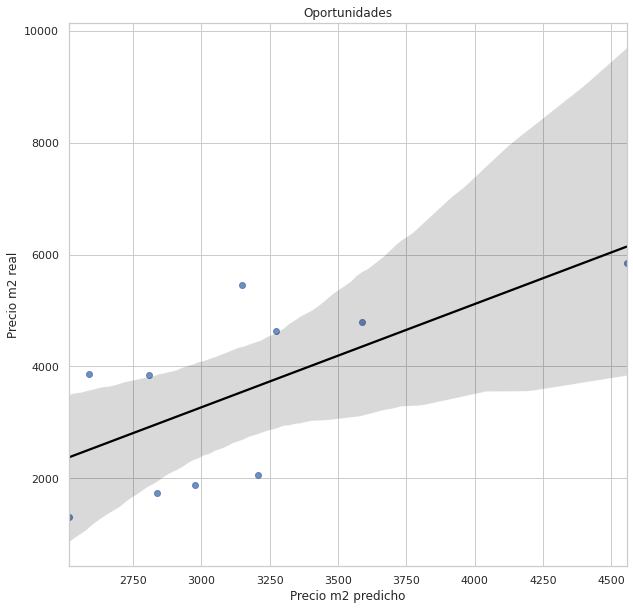

In [367]:
#Oportunidades
plt.figure(figsize=(10,10))

sns.color_palette("vlag")
sns.regplot(x='predicho', y='price_usd_per_m2', data = df_diferencias, line_kws={'color': 'black'})

plt.title("Oportunidades")
plt.xlabel('Precio m2 predicho')
plt.ylabel('Precio m2 real')
plt.show()

Vemos que el primer registro es el que posee mayor diferencia el cual corresponde a Recoleta por lo que analizamos la información de CABA para Recoleta:

In [368]:
mask_recoleta=caba.place_name_caba_mayus=='RECOLETA'

In [369]:
caba[mask_recoleta].price_usd_per_m2.describe()

count    2572.000000
mean     3111.282464
std       855.365291
min       970.149254
25%      2533.553789
50%      2987.729600
75%      3600.000000
max      6046.511628
Name: price_usd_per_m2, dtype: float64

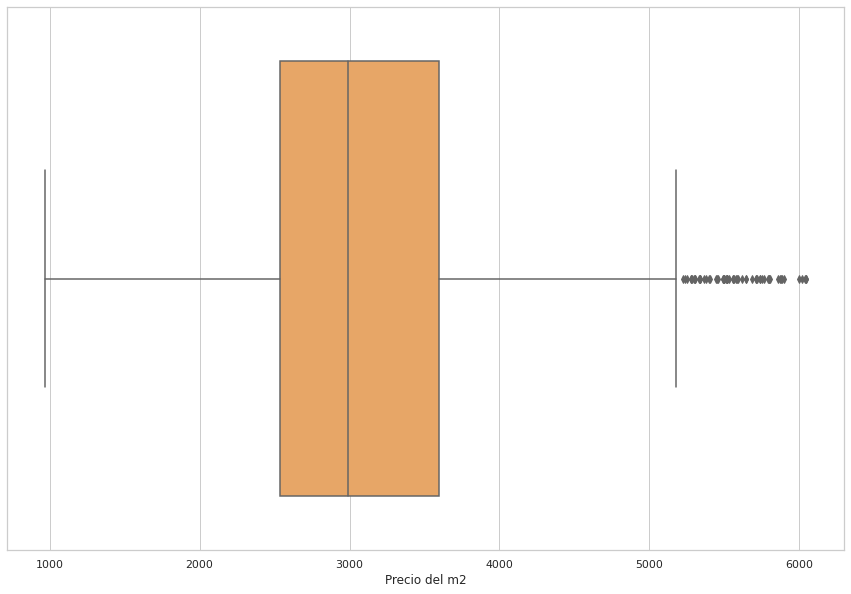

In [370]:
fig1, ax1 = plt.subplots(figsize=(15,10))
sns.boxplot(caba[mask_recoleta].price_usd_per_m2, color = '#fca652')
plt.xlabel('Precio del m2')
plt.show()

Vemos que la mayor parte de los precios se concentran entre 2000 y 4000 mientras que el caso puntual que estamos analizando como valor real tiene 5460 y el predicho es de 3148 (cercano a la mediana).

###10 propiedades más subvaluadas

Dentro de nuestra muestra de 100 propiedades, identificamos las 10 que, según el modelo más exitoso, más subvaluadas están. Esto significa que serían aquellas que mejores oportunidades de inversión representan.

In [371]:
dif.sort_values(by="price_usd_per_m2", ascending=True, inplace=True)

dif.head(10)

,price_usd_per_m2,evaluacion
105936,-1207.684316,Subvaluado
104648,-1142.400131,Subvaluado
62563,-1105.363605,Subvaluado
43805,-1088.846503,Subvaluado
76098,-967.115006,Subvaluado
9097,-906.993989,Subvaluado
58511,-902.903617,Subvaluado
33745,-742.916321,Subvaluado
79325,-740.502180,Subvaluado
52869,-717.913644,Subvaluado


In [372]:
indices_subvaluados = [105936, 104648, 62563, 43805, 76098, 9097, 58511, 33745, 79325, 52869]

Observamos en el dataframe real cuáles son las 10 propiedades que nos interesan

In [373]:
data.loc[indices_subvaluados]

,property_type,state_name,geonames_id,lat,lon,surface_covered_in_m2,price_usd_per_m2,place_name_caba_mayus,comuna,place_name_2,surface_total_in_m2_clean,ambientes,cochera,gimnasio,sum,pileta,parrilla,cantidad_amenities,estado
105936,apartment,Capital Federal,3429576.0,-34.602160,-58.374561,88.0,1306.818182,RETIRO,1.0,Retiro,88.0,3.0,1,0,0,0,0,0,0
104648,apartment,Capital Federal,3430234.0,-34.576465,-58.423991,121.0,2064.000000,PALERMO,14.0,Palermo,125.0,3.0,1,0,1,1,1,3,0
62563,PH,Capital Federal,3429595.0,-34.594341,-58.409369,70.0,1732.558140,RECOLETA,2.0,Recoleta,86.0,3.0,0,0,0,0,0,0,0
43805,apartment,Capital Federal,3429595.0,-34.592608,-58.410879,47.0,1888.484947,RECOLETA,2.0,Recoleta,95.0,2.0,0,0,0,0,0,0,0
76098,house,Capital Federal,3429422.0,-34.545367,-58.485988,327.0,1076.066790,SAAVEDRA,12.0,Saavedra,230.0,7.0,1,0,0,1,1,2,0
9097,apartment,Capital Federal,3430234.0,-34.590224,-58.424028,38.0,2186.046512,PALERMO,14.0,Palermo,43.0,1.0,0,0,1,1,1,3,0
58511,apartment,Capital Federal,3429595.0,-34.595731,-58.391985,100.0,2075.471698,RECOLETA,2.0,Recoleta,106.0,3.0,0,0,0,0,0,0,0
33745,apartment,Capital Federal,3430234.0,-34.597713,-58.424199,39.0,2200.000000,PALERMO,14.0,Palermo,39.0,2.0,0,0,0,0,0,0,0
79325,apartment,Capital Federal,3429422.0,-34.557495,-58.480617,59.0,2211.764706,SAAVEDRA,12.0,Saavedra,85.0,3.0,1,1,1,1,1,4,0
52869,apartment,Capital Federal,3429595.0,-34.589546,-58.397364,41.0,2390.243902,RECOLETA,2.0,Recoleta,41.0,2.0,0,0,0,0,0,0,0


In [374]:
subvaluados_ahorro_m2 = dif.loc[indices_subvaluados, 'price_usd_per_m2']

Transformamos a los casos con metro cuadrado más subvaluado en un dataframe, y cambiamos el signo de la diferencia entre valor real y predicho, para facilitar su comprensión.

In [375]:
subvaluados_ahorro_m2 = pd.DataFrame(data=subvaluados_ahorro_m2)

subvaluados_ahorro_m2['price_usd_per_m2'] = subvaluados_ahorro_m2['price_usd_per_m2'].apply(lambda x: x*-1)

subvaluados_ahorro_m2

,price_usd_per_m2
105936,1207.684316
104648,1142.400131
62563,1105.363605
43805,1088.846503
76098,967.115006
9097,906.993989
58511,902.903617
33745,742.916321
79325,740.502180
52869,717.913644


In [376]:
subvaluados_ahorro_m2.reset_index(inplace=True)

subvaluados_ahorro_m2

,index,price_usd_per_m2
0,105936,1207.684316
1,104648,1142.400131
2,62563,1105.363605
3,43805,1088.846503
4,76098,967.115006
5,9097,906.993989
6,58511,902.903617
7,33745,742.916321
8,79325,740.502180
9,52869,717.913644


Renombramos los campos del dataframe con los casos con metros cuadrados más subvaluados.

In [377]:
subvaluados_ahorro_m2.rename(columns={"index": "Indice de propiedad"}, inplace=True)
subvaluados_ahorro_m2

,Indice de propiedad,price_usd_per_m2
0,105936,1207.684316
1,104648,1142.400131
2,62563,1105.363605
3,43805,1088.846503
4,76098,967.115006
5,9097,906.993989
6,58511,902.903617
7,33745,742.916321
8,79325,740.502180
9,52869,717.913644


In [378]:
subvaluados_ahorro_m2.rename(columns={"price_usd_per_m2": "subvarolacion_m2"}, inplace=True)
subvaluados_ahorro_m2

,Indice de propiedad,subvarolacion_m2
0,105936,1207.684316
1,104648,1142.400131
2,62563,1105.363605
3,43805,1088.846503
4,76098,967.115006
5,9097,906.993989
6,58511,902.903617
7,33745,742.916321
8,79325,740.502180
9,52869,717.913644


Observamos gráficamente la diferencia en el ahorro por metro cuadrado de las 10 propiedades que mejor oportunidad de inversión representan.

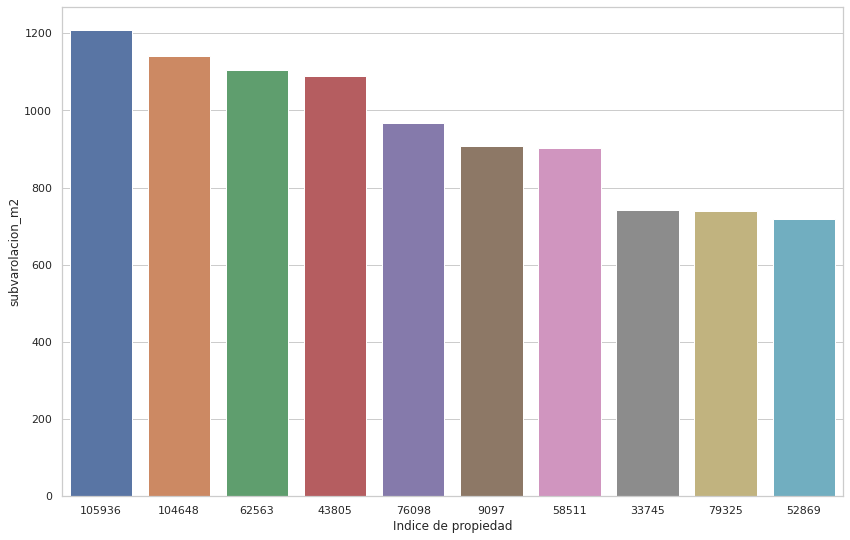

In [379]:
sns.set(rc={'figure.figsize':(14,9)})

sns.set_style("whitegrid")

sns.barplot(data=subvaluados_ahorro_m2, y="subvarolacion_m2", x="Indice de propiedad", order = subvaluados_ahorro_m2.sort_values(by="subvarolacion_m2", ascending=False)["Indice de propiedad"])

Transformamos en lista la diferencia entre precio real de metro cuadrado y la predicción, y el campo de superficie las propiedades a las que corresponden, para posibilitar una multiplicación.

La idea es determinar el total que podría llegar a ahorrarse al comprar alguno de los inmuebles que presentan los metros cuadrados más subvaluados.

In [380]:
lista_subvaluados = subvaluados_ahorro_m2['subvarolacion_m2'].tolist()

In [381]:
 subvaluados_m2 = data.loc[indices_subvaluados, 'surface_total_in_m2_clean']
 subvaluados_m2.tolist()

[88.0, 125.0, 86.0, 95.0, 230.0, 43.0, 106.0, 39.0, 85.0, 41.0]

A continuación se expresa, según la comparación entre nuestro modelo y el valor real del mercado, la ganancia total que significaría comprar alguna de estas 10 propiedades (en dólares).

In [382]:
total_ahorro_10_mejores = (lista_subvaluados * subvaluados_m2)
total_ahorro_10_mejores

105936    106276.219834
104648    142800.016387
62563      95061.270068
43805     103440.417762
76098     222436.451381
9097       39000.741528
58511      95707.783384
33745      28973.736520
79325      62942.685299
52869      29434.459423
Name: surface_total_in_m2_clean, dtype: float64

Creamos un dataframe con para visualizar el ahorro nominal de comprar cada una de las 10 propiedades.

In [383]:
ahorro_nominal = pd.DataFrame(data=total_ahorro_10_mejores)

ahorro_nominal.columns = ['Ahorro']

ahorro_nominal

,Ahorro
105936,106276.219834
104648,142800.016387
62563,95061.270068
43805,103440.417762
76098,222436.451381
9097,39000.741528
58511,95707.783384
33745,28973.736520
79325,62942.685299
52869,29434.459423


In [384]:
ahorro_nominal.reset_index(inplace=True)

ahorro_nominal

,index,Ahorro
0,105936,106276.219834
1,104648,142800.016387
2,62563,95061.270068
3,43805,103440.417762
4,76098,222436.451381
5,9097,39000.741528
6,58511,95707.783384
7,33745,28973.736520
8,79325,62942.685299
9,52869,29434.459423


Renombramos el índice del dataframe que muestra los ahorros totales.

In [385]:
ahorro_nominal.rename(columns={"index": "Indice de propiedad"}, inplace=True)

ahorro_nominal.sort_values(by="Ahorro", ascending=False, inplace=True)

ahorro_nominal

,Indice de propiedad,Ahorro
4,76098,222436.451381
1,104648,142800.016387
0,105936,106276.219834
3,43805,103440.417762
6,58511,95707.783384
2,62563,95061.270068
8,79325,62942.685299
5,9097,39000.741528
9,52869,29434.459423
7,33745,28973.736520


Observamos gráficamente, a partir de las 10 propiedades con el metro cuadrado más subvaluado, qué tanto se puede ahorrar en términos nominales, considerando la superficie total del inmueble en cuestión.

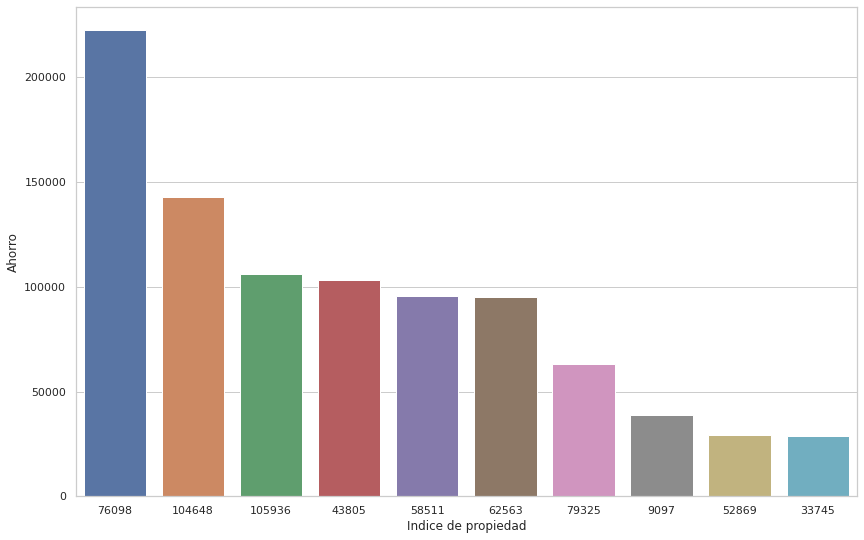

In [386]:
sns.set(rc={'figure.figsize':(14,9)})

sns.set_style("whitegrid")

sns.barplot(data=ahorro_nominal, y="Ahorro", x="Indice de propiedad", order = ahorro_nominal.sort_values(by="Ahorro", ascending=False)["Indice de propiedad"])

# Conclusiones

Nuestro modelo de base fue de toda Argentina y logramos un $R^2$ de 0,40. 

Al hacerlo solo con las propiedades de CABA pudimos llevar el $R^2$ a 0,49.
Las features que utilizamos para este modelo fueron las siguientes:
*   property_type
*   surface_total_in_m2_clean
*   ambientes
*   parrilla
*   sum
*   cochera
*   gimnasio
*   pileta
*   place_name_2
*   comuna
*   estado
*   surface_al_cuadrado

Luego intentamos haciendo cross-validation con una regresión Ridge, pero obtuvimos un valor de $R^2$ un tanto menor al que habíamos obtenido con la regresión lineal múltiple. Consideramos que esto pasa porque el modelo base es una regresión lineal. Al ser un modelo tan simple, no llega a hacer overfitting. En esencia, estamos queriendo describir de forma lineal datos que representan patrones más complejos.

Finalmente, probamos con una regresión Lasso y obtuvimos un $R^2$ de 0,53, levemente por encima del 0,49 que habíamos obtenido con la regresión lineal múltiple. Creemos que esta mejoría se debe a que la regresión Lasso puede seleccionar variables y descartar las que no le sirven, incluso entre las generadas con el comando `pd.get_dummies`. 



Las variables que más pesan y las que la regresión Lasso identificó como prescindibles pueden ser vistas a continuación:

['property_type', 'geonames_id', 'lat', 'lon', 'place_name_caba_mayus', 'comuna', 'place_name_2', 'surface_total_in_m2_clean', 'ambientes', 'cochera', 'gimnasio', 'sum', 'pileta', 'parrilla', 'estado', 'surface_al_cuadrado']
Cantidad de datos: (20915, 20)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 591832.773321867, tolerance: 283587.5697639737
  tol, rng, random, positive)


MSE: 380633.8148567443
RMSE: 616.9552778417122
R2: 0.5353367486613683
--------------------
DataFrame con todos los coeficientes ordenados de mayor a menor:
                                Variable  Coeficiente
0    place_name_caba_mayus_PUERTO MADERO  2373.966092
1         place_name_caba_mayus_RECOLETA   761.763937
2                    property_type_store   749.822116
3                                    lat   682.606500
4          place_name_caba_mayus_PALERMO   534.555069
..                                   ...          ...
109  place_name_caba_mayus_VILLA SOLDATI  -259.895185
110      place_name_caba_mayus_VERSALLES  -270.606227
111           place_name_caba_mayus_BOCA  -375.184040
112  place_name_caba_mayus_NUEVA POMPEYA  -439.624247
113   place_name_caba_mayus_VILLA LUGANO  -492.879637

[114 rows x 2 columns]

Las 5 variables con coeficiente positivo de más peso son: 
                              Variable  Coeficiente
0  place_name_caba_mayus_PUERTO MADERO  2373.966092
1       

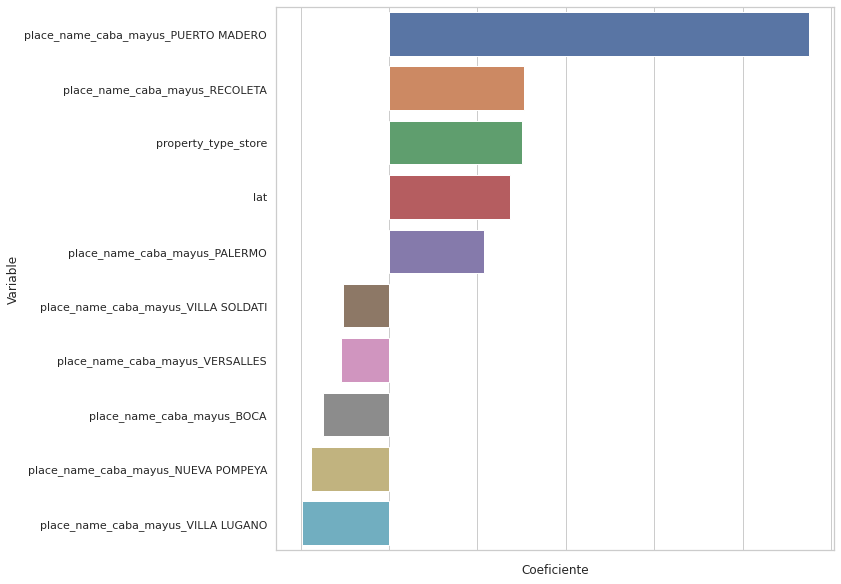

In [387]:
regression_base(X_features_6,caba,lassocv,1)

En el gráfico de barras plasmado, se pueden apreciar los 5 atributos con mayor peso en el modelo en cuanto a su correlación positiva y su correlación negativa. Por consiguiente vemos que Puerto Madero y Recoleta infieren mucho en el aumento del precio mientras que Lugano y Nueva Pompeya correlacionan de forma negativa con respecto a la variable target.